<h1 style="color:#f56c42;">Topic: Used Automobile Vehicle (Cars) Price Prediction Based on Available Previous Dataset  </h1>


<h2>Context:</h2>

<span style="color:#9d36eb; text-align: justify;">
    For this module final assessment submission, I am imagining myself as a newly appointed data scientist for Used Cars Dealership Company.
</span>




Dataset Url:  https://www.kaggle.com/datasets/rosin9/used-car-price-prediction-dataset


<h2 >Business Problem: </h2>

<span style="color:blue; text-align: justify;">
    A wellknowned used car dealership company sells and buys different type second hand used cars from the customers. They handel and deal the sale of all types of cars like vintage, sports, automatic, manual cars from diffrent UCD_trying_models and Car_Manufactures. 



<span style="color:blue; text-align: justify;">
    The dealership company team wants to make sure they buy and sell cars at good range of price. They have a problem of deciding the right price for each car and they dont want to trade for too cheap or expensive price range. There is chance of company making loss and lossing the customers.  It is necessary for them to know the price of car as it depend on the age, color, type, how much it was driven, if it had any accidents and insurance claimed befor and depend on many other condition of the automobile vechicle. 
</span>

Addressing this business problem is important because it allows the company to effectively manage its pricing process, optimizing inventory with good level of investment, and avoding over or underpricing as well as maintaining profitablity.

<h4>
    Solving this problem helps used car dealership company. 

- To avoid loss of investment and maintain profit.
  
- To offer competitive and profitable price, by avoding over or underpricing.
  
- To improve sales strategy by boosting sales, preventing cars being unsold for long time.

- To optimize inventory.

- To enhance customer trust.

</h4>

<h2 >Machine Learning Task: </h2>

**Problem Statement:**
To estimate the price of the used cars depending on some characteristics like Car_Manufacture, UCD_trying_models, year, mileage, fuel type, engine size, gear_system type, accident history, a clean title.

**Type of Machine Learning Task:**
This problem is related to supervised learning, where goal is to predict the price which is dependent continuous target variable based on multiple independent variables. 

<h2>Data Exploration:¶
</h2>

<h2 style="color:#9d36eb;">Step 0: Importing Libraries and Loading the .csv file Dataset</h2>

In [15]:
# Importing the necessary Basic libraries required
import pandas as pnd
import numpy as npy
import matplotlib.pylab as mplt
import seaborn as sea

# Setting the plots to display in same notebook
%matplotlib inline

#Importing the warning package to ignore the warning message that pops up during inpylace=True
import warnings
warnings.filterwarnings("ignore")

# Setting the style of the appearance of displayed plots to "ggplot"
mplt.style.use("ggplot")

# Setting the max no of columns to display to 20
pnd.set_option("display.max_columns", 60)

import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"
os.environ["OMP_NUM_THREADS"] = "1"

import re

**Imorting ML Libraries**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

**Loading the Dataset**

In [19]:
# Loading a .csv dataset file into a pandas dataFrame using .read_csv()
available_used_car_dataset_my_used_car_data_df = pnd.read_csv("../Main/M505 Intro to AI and Machine Learning/Kaggel_Used_Cars_Data.csv",low_memory=False)

In [20]:
#Copying the dataset for further processing
my_used_car_data_df = available_used_car_dataset_my_used_car_data_df.copy()

<h2 style="color:#9d36eb;">Step 1: Understanding the Dataset</h2>

In [22]:
#Printing the no of rows and colums in the dataset
print(f"The no of Columns in dataset: {my_used_car_data_df.shape[1]}")
print(f"The no of Rows in dataset: {my_used_car_data_df.shape[0]}")

The no of Columns in dataset: 12
The no of Rows in dataset: 4009


In [23]:
#Dataset columns and their data type
column_datatype = my_used_car_data_df.dtypes.to_frame()
column_datatype.rename(columns = { 0:"Data Type"},inplace=True)
column_datatype

Data Type
brand           object
model           object
model_year       int64
milage          object
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price           object

As we can observer that some column data type is missmached which we have to correct it before we proceed further. However changing the coloumn header name according to our convention and redability is necessary.

In [25]:
#Columns name of the dataset is renamed
my_used_car_data_df.columns = ["Car_Manufacture",
                     "Car_Model",
                     "Car_Manufacture_Year",
                     "Distance_Driven_in_Miles",
                     "Car_Fuel_Category",
                     "Car_Engine_Type",
                     "Car_Gear_System",
                     "Car_Color",
                     "Car_Interior_Color",
                     "Car_Accident_Status",
                     "Car_Title_Status",
                     "Car_Price_in_Dollors"]


In [26]:
my_used_car_data_df

Car_Manufacture                        Car_Model  Car_Manufacture_Year  \
0               Ford  Utility Police Interceptor Base                  2013   
1            Hyundai                     Palisade SEL                  2021   
2              Lexus                    RX 350 RX 350                  2022   
3           INFINITI                 Q50 Hybrid Sport                  2015   
4               Audi        Q3 45 S line Premium Plus                  2021   
...              ...                              ...                   ...   
4004         Bentley             Continental GT Speed                  2023   
4005            Audi             S4 3.0T Premium Plus                  2022   
4006         Porsche                           Taycan                  2022   
4007            Ford                     F-150 Raptor                  2020   
4008             BMW                     X3 xDrive30i                  2020   

     Distance_Driven_in_Miles Car_Fuel_Category  \
0                  51,000 mi.     E85 Flex Fuel   
1                  34,742 mi.          Gasoline   
2                  22,372 mi.          Gasoline   
3                  88,900 mi.            Hybrid   
4                   9,835 mi.          Gasoline   
...                       ...               ...   
4004                  714 mi.          Gasoline   
4005               10,900 mi.          Gasoline   
4006                2,116 mi.               NaN   
4007               33,000 mi.          Gasoline   
4008               43,000 mi.          Gasoline   

                                        Car_Engine_Type  \
0     300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...   
1                                  3.8L V6 24V GDI DOHC   
2                                        3.5 Liter DOHC   
3     354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...   
4                            2.0L I4 16V GDI DOHC Turbo   
...                                                 ...   
4004                   6.0L W12 48V PDI DOHC Twin Turbo   
4005      349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   
4006                                           Electric   
4007      450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
4008       248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                        Car_Gear_System               Car_Color  \
0                           6-Speed A/T                   Black   
1                     8-Speed Automatic         Moonlight Cloud   
2                             Automatic                    Blue   
3                           7-Speed A/T                   Black   
4                     8-Speed Automatic  Glacier White Metallic   
...                                 ...                     ...   
4004  8-Speed Automatic with Auto-Shift                   C / C   
4005     Transmission w/Dual Shift Mode                   Black   
4006                          Automatic                   Black   
4007                                A/T                    Blue   
4008                                A/T                    Gray   

     Car_Interior_Color                     Car_Accident_Status  \
0                 Black  At least 1 accident or damage reported   
1                  Gray  At least 1 accident or damage reported   
2                 Black                           None reported   
3                 Black                           None reported   
4                 Black                           None reported   
...                 ...                                     ...   
4004            Hotspur                           None reported   
4005              Black                           None reported   
4006              Black                           None reported   
4007              Black                           None reported   
4008              Brown  At least 1 accident or damage reported   

     Car_Title_Status Car_Price_in_Dollors  
0                 Yes              $10,300  
1                 Yes             

**Data_Characteristics**

This above dataset have crucial information, which is especially helpful in predicting a used car selling price. 


    




<span style="color:blue; text-align: justify;">

**Categorical Data:**

<li>Car_Manufacture
<li>Car_Model
<li>Car_Fuel_Category
<li>Car_Engine_Type
<li>Car_Gear_System
<li>Car_Color
<li>Car_Interior_Color
<li>Car_Accident_Status - Binary
<li>Car_Title_Status - Binary
</li>
</span>

<span style="color:red; text-align: justify;">

**Numeric Continuous Data:**
<li>Car_Manufacture_Year
<li>Distance_Driven_in_Miles
<li>Car_Price_in_Dollors

**Checking for null and duplicate value**

In [32]:
#Does the dataset have ? values
question_mark_values = (my_used_car_data_df == "?").sum().sum()
print(question_mark_values)

0


In [33]:
#looking for duplicate values in dataset
print(f"The Dataset Contains {my_used_car_data_df.duplicated(keep = "first").sum()}  Duplicate Rows")

The Dataset Contains 0  Duplicate Rows


In [34]:
#Checking for null values in dataset
my_used_car_data_df.isna().sum()

Car_Manufacture               0
Car_Model                     0
Car_Manufacture_Year          0
Distance_Driven_in_Miles      0
Car_Fuel_Category           170
Car_Engine_Type               0
Car_Gear_System               0
Car_Color                     0
Car_Interior_Color            0
Car_Accident_Status         113
Car_Title_Status            596
Car_Price_in_Dollors          0
dtype: int64

In [35]:
#visualising the percentage of null values

null_values = (my_used_car_data_df.isna().sum()/my_used_car_data_df.shape[0]*100).plot(kind = "barh",color="red")
mplt.xlim(0,20)
mplt.ylabel("Data_Set_Column")
mplt.xlabel("Null Values %")
mplt.title("Percentage of Null Value")
mplt.figure(figsize=(20, 10))
for columns in null_values.containers:
    null_values.bar_label(columns, fmt="%.2f%%")


<h2 style="color:#9d36eb;">Step 2: Data cleaning and Visulization</h2>

In [37]:
#Changing Car_Price_in_Dollors Column Datatype to int

#Function to remove "$" str from Car_Price_in_Dollors columns value
def remove_dollor_sign_from_data(data):
    dollor_sign_data = str(data).replace("$", "").replace(",", "").strip()
    return int(dollor_sign_data)

my_used_car_data_df["Car_Price_in_Dollors"] = my_used_car_data_df["Car_Price_in_Dollors"].apply(remove_dollor_sign_from_data)
my_used_car_data_df["Car_Price_in_Dollors"]=my_used_car_data_df["Car_Price_in_Dollors"].astype("int")

In [38]:
#Changing Distance_Driven_in_Miles Column Datatype to int

#Function to remove "mi." str from Distance_Driven_in_Miles columns value
def remove_mi_from_data(data):
    milage_data = str(data).replace(" mi.", "").replace(",", "").strip()
    return int(milage_data)

my_used_car_data_df["Distance_Driven_in_Miles"] = my_used_car_data_df["Distance_Driven_in_Miles"].apply(remove_mi_from_data)
my_used_car_data_df["Distance_Driven_in_Miles"]=my_used_car_data_df["Distance_Driven_in_Miles"].astype("int")

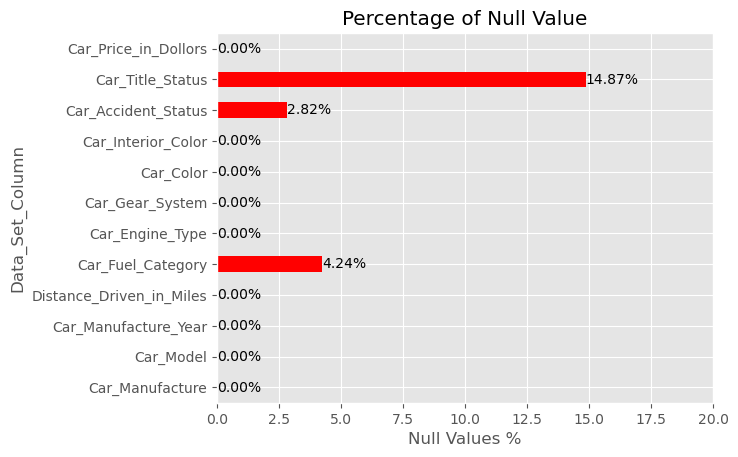

<Figure size 2000x1000 with 0 Axes>

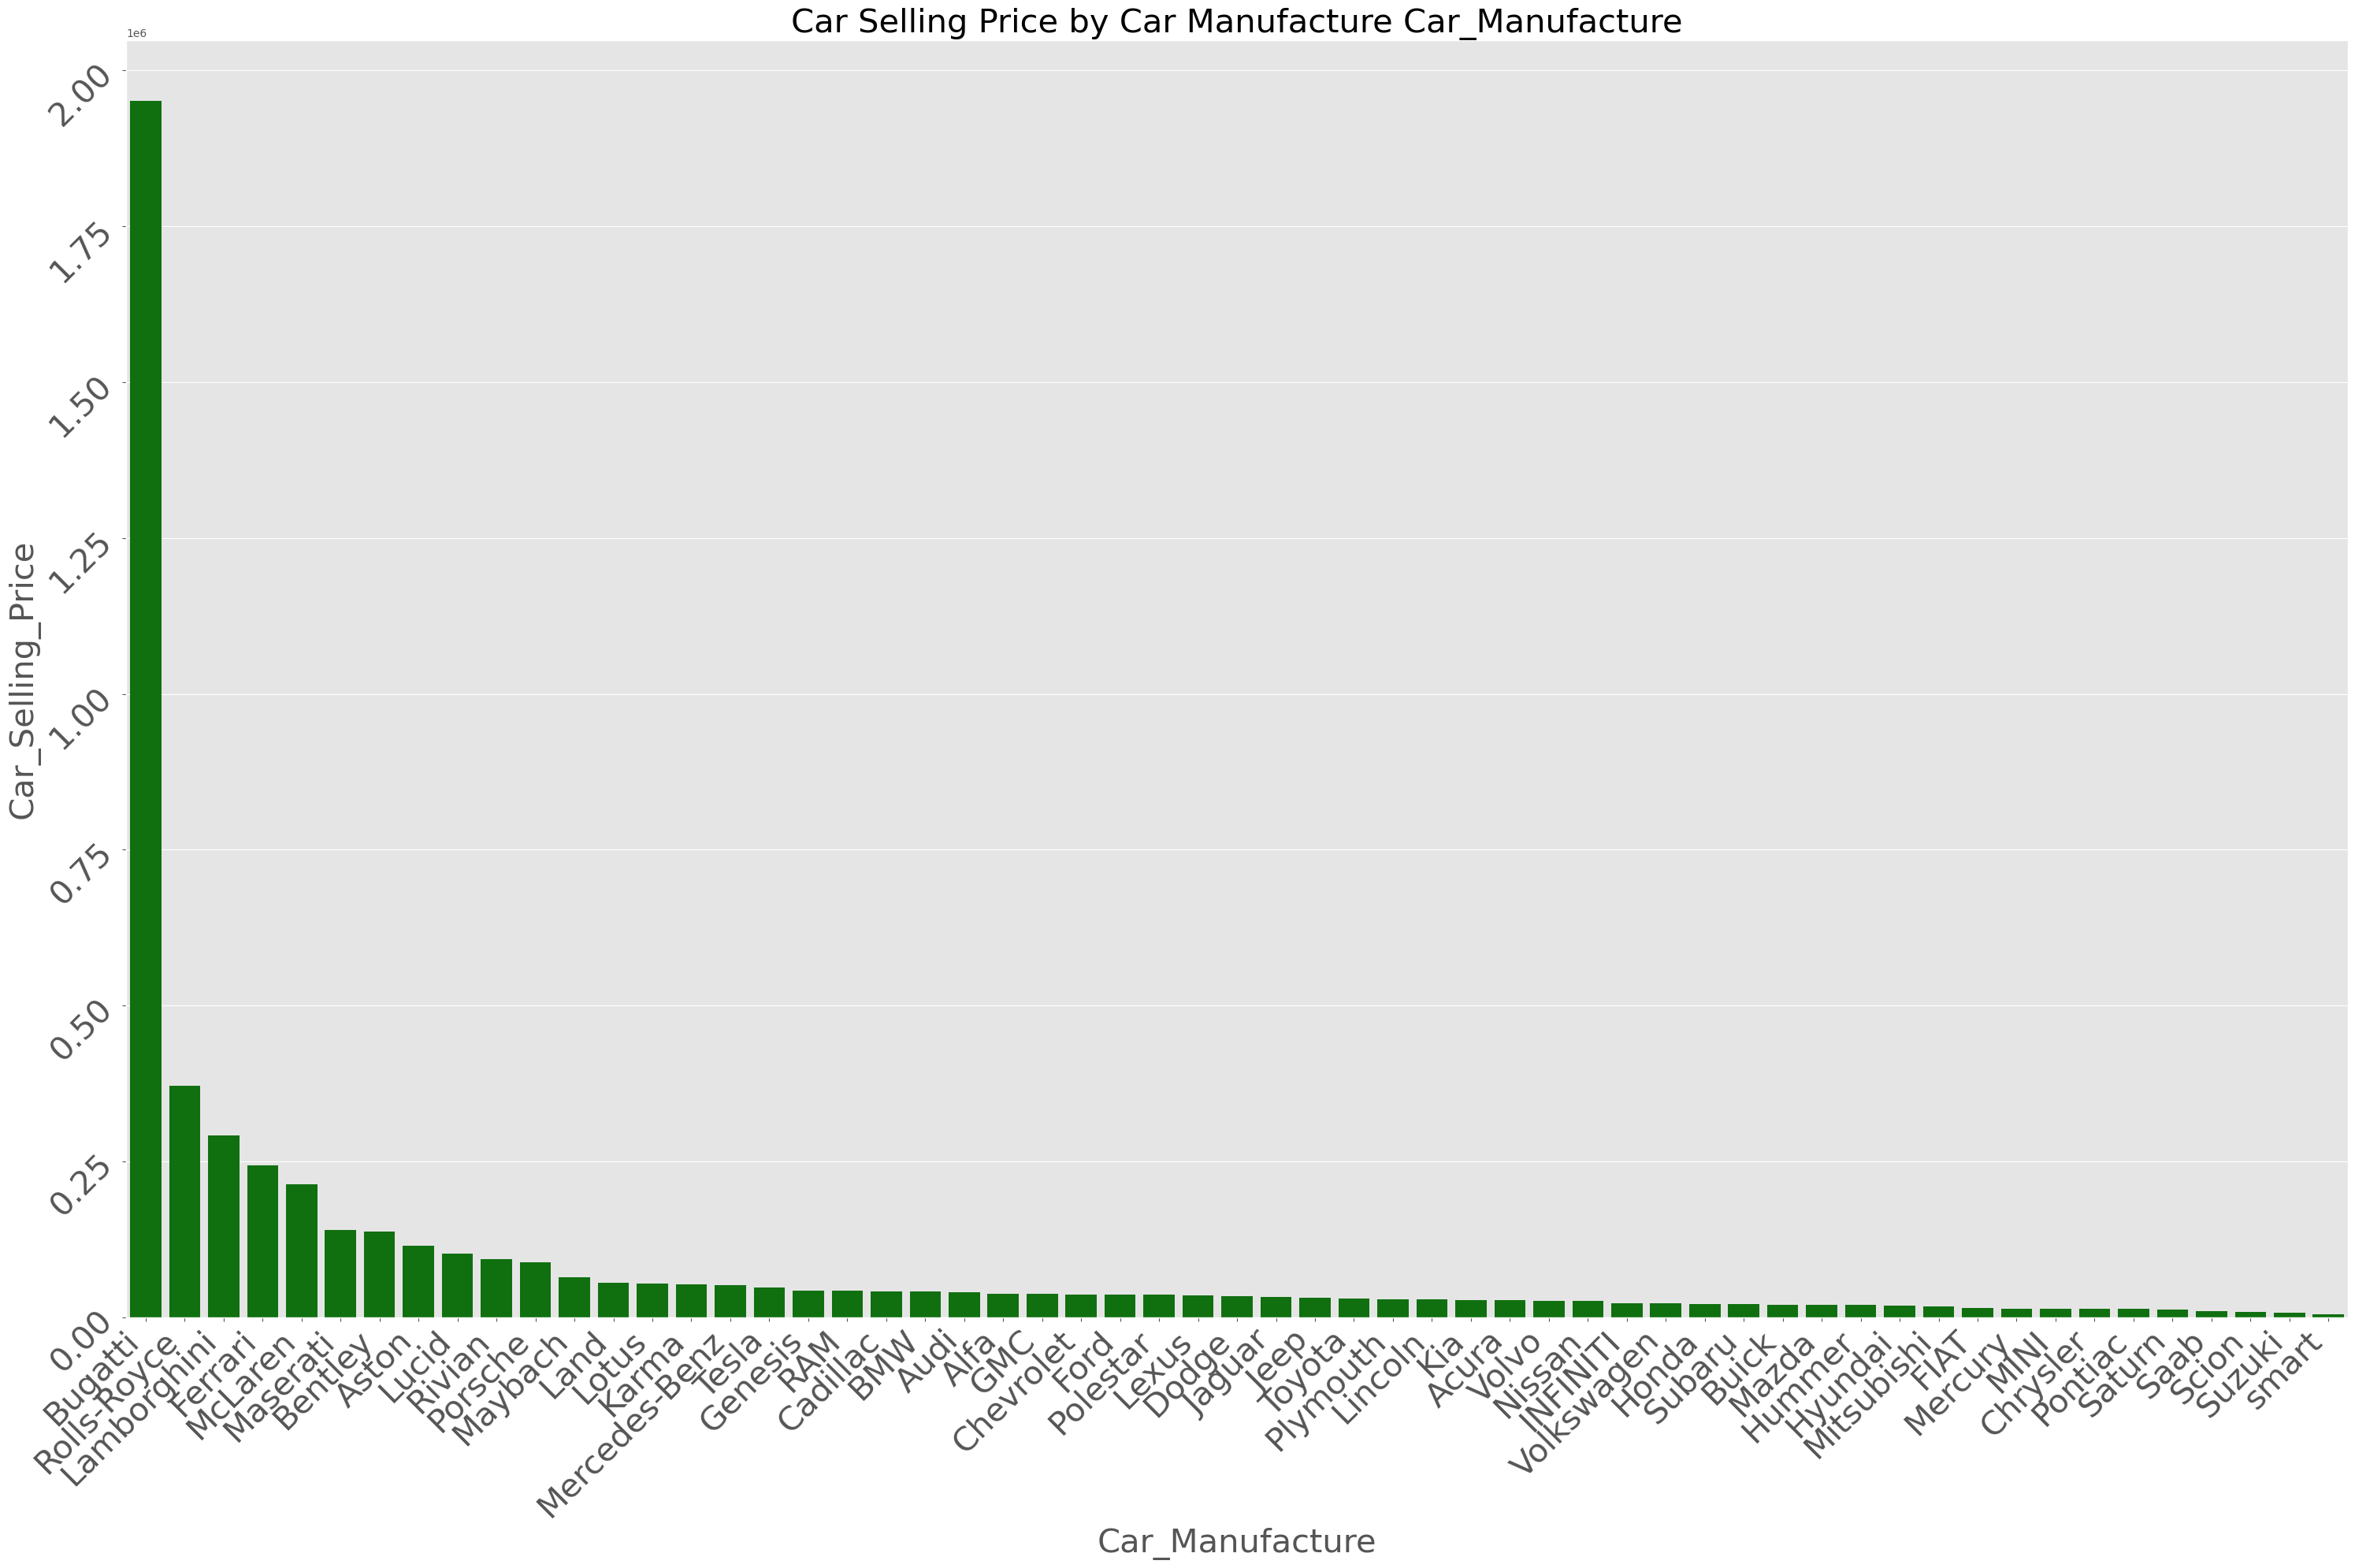

In [39]:
manufacture_and_price = my_used_car_data_df.groupby("Car_Manufacture")["Car_Price_in_Dollors"].mean().reset_index()
manufacture_and_price_grouped_my_used_car_data_df = manufacture_and_price.sort_values(by="Car_Price_in_Dollors", ascending=False)

mplt.figure(figsize=(30, 20))
sea.barplot(x=manufacture_and_price_grouped_my_used_car_data_df["Car_Manufacture"], y=manufacture_and_price_grouped_my_used_car_data_df["Car_Price_in_Dollors"], color="green", errorbar=None)
mplt.title("Car Selling Price by Car Manufacture Car_Manufacture",fontsize=30)
mplt.xlabel("Car_Manufacture",fontsize=30)
mplt.ylabel("Car_Selling_Price",fontsize=30)
mplt.xticks(rotation=45, ha="right", fontsize=30) 
mplt.yticks(rotation=45, ha="right", fontsize=30)  
mplt.tight_layout()
mplt.show()

Before droping 

 Car_Fuel_Category
Gasoline          3309
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64

After droping 

 Car_Fuel_Category
Gasoline          3309
Hybrid             194
E85 Flex Fuel      139
Diesel             116
Plug-In Hybrid      34
Name: count, dtype: int64


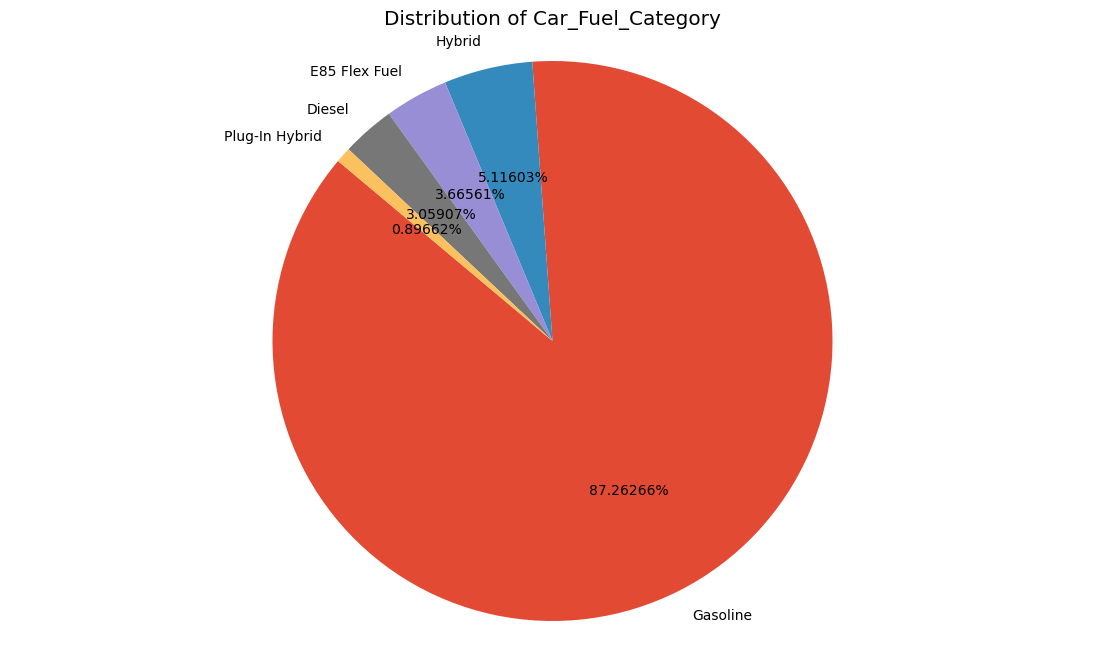

In [40]:
#Dealing with the missing Values in Car_Fuel_Category
print(f"Before droping \n\n {my_used_car_data_df["Car_Fuel_Category"].value_counts()}")

""" #Droping the rows containg _ and not supported values as 
    Fuel category is important variable."""
my_used_car_data_df["Car_Fuel_Category"] = my_used_car_data_df["Car_Fuel_Category"].replace("–",npy.nan).replace("not supported",npy.nan)
my_used_car_data_df = my_used_car_data_df.dropna(subset=["Car_Fuel_Category"], axis=0)
print()
print(f"After droping \n\n {my_used_car_data_df["Car_Fuel_Category"].value_counts()}")


#Distribution of Car_Fuel_Category
mplt.figure(figsize=(14,8 ))
pie_chart_data = my_used_car_data_df["Car_Fuel_Category"].value_counts()
mplt.pie(pie_chart_data,labels=pie_chart_data.index,autopct="%1.5f%%", startangle=140)
mplt.title("Distribution of Car_Fuel_Category")
mplt.axis("equal")
mplt.show()




After  

 Car_Accident_Status
None reported                             2825
At least 1 accident or damage reported     967
Name: count, dtype: int64


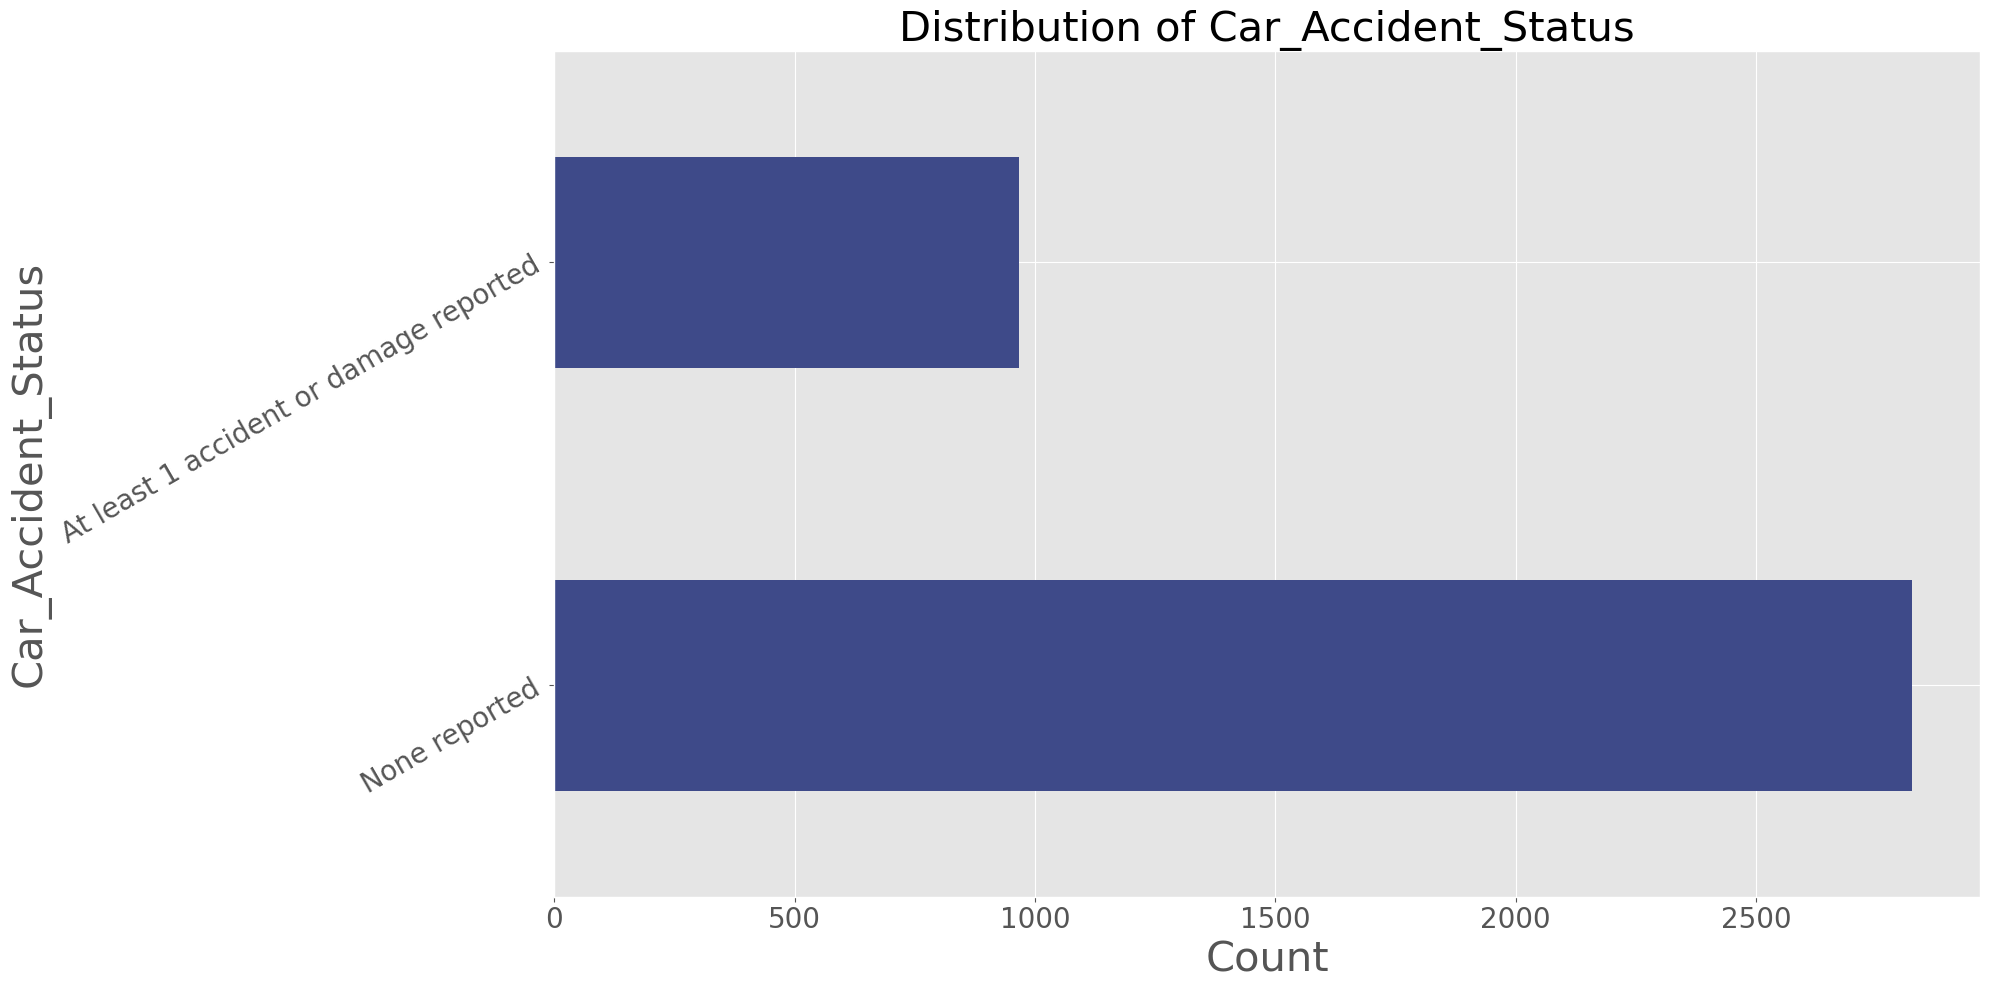

In [41]:
#Droping the rows is not a good idea, so lets replace it by most frquent value
my_used_car_data_df["Car_Accident_Status"] = my_used_car_data_df["Car_Accident_Status"].replace(npy.nan,my_used_car_data_df["Car_Accident_Status"].mode()[0])

print()
print(f"After  \n\n {my_used_car_data_df["Car_Accident_Status"].value_counts()}")

#Distribution of "Car_Accident_Status"
mplt.figure(figsize=(20, 10))
my_used_car_data_df["Car_Accident_Status"].value_counts().plot(kind= "barh",color="#3E4A89")
mplt.title("Distribution of Car_Accident_Status",fontsize=30)
mplt.xlabel("Count",fontsize=30)
mplt.ylabel("Car_Accident_Status",fontsize=30)
mplt.yticks(rotation=30, ha="right",fontsize=20) 
mplt.xticks(fontsize=20)  
mplt.tight_layout()
mplt.show()

In [42]:
#Dealing with the missing Values in Car_Title_Status
print(f"Before  \n\n {my_used_car_data_df["Car_Title_Status"].value_counts()}")

#Droping the rows is not a good idea, so lets replace it by NO value
my_used_car_data_df["Car_Title_Status"] = my_used_car_data_df["Car_Title_Status"].replace(npy.nan,"No")

print()
print(f"After  \n\n {my_used_car_data_df["Car_Title_Status"].value_counts()}")

Before  

 Car_Title_Status
Yes    3223
Name: count, dtype: int64

After  

 Car_Title_Status
Yes    3223
No      569
Name: count, dtype: int64


In [43]:
#Reverifing the null values in dataset
my_used_car_data_df.isna().sum()

Car_Manufacture             0
Car_Model                   0
Car_Manufacture_Year        0
Distance_Driven_in_Miles    0
Car_Fuel_Category           0
Car_Engine_Type             0
Car_Gear_System             0
Car_Color                   0
Car_Interior_Color          0
Car_Accident_Status         0
Car_Title_Status            0
Car_Price_in_Dollors        0
dtype: int64

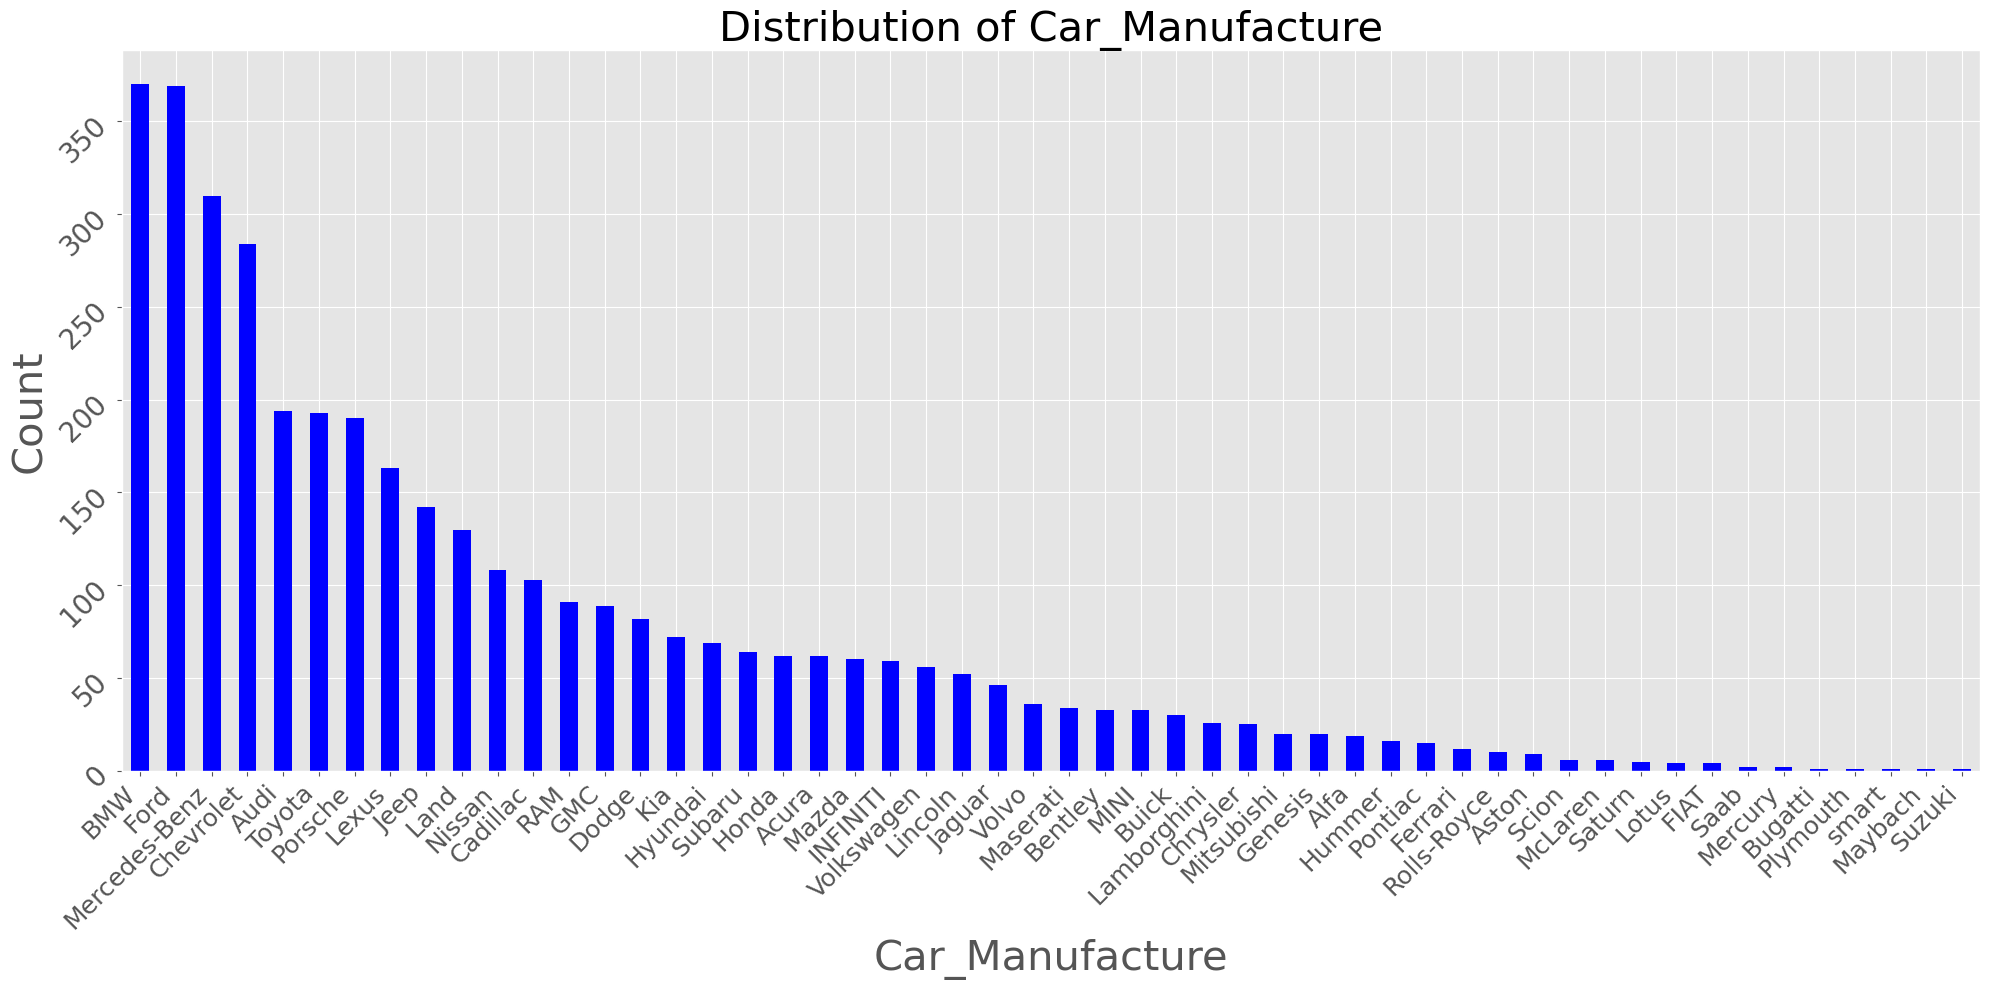

In [44]:
#Distribution of Car_Manufacture
mplt.figure(figsize=(20, 10))
my_used_car_data_df["Car_Manufacture"].value_counts().plot(kind= "bar",color="blue")
mplt.title("Distribution of Car_Manufacture",fontsize=30)
mplt.xlabel("Car_Manufacture",fontsize=30)
mplt.ylabel("Count",fontsize=30)
mplt.xticks(rotation=45, ha="right", fontsize=18) 
mplt.yticks(rotation=45, ha="right", fontsize=20)  
mplt.tight_layout()
mplt.show()


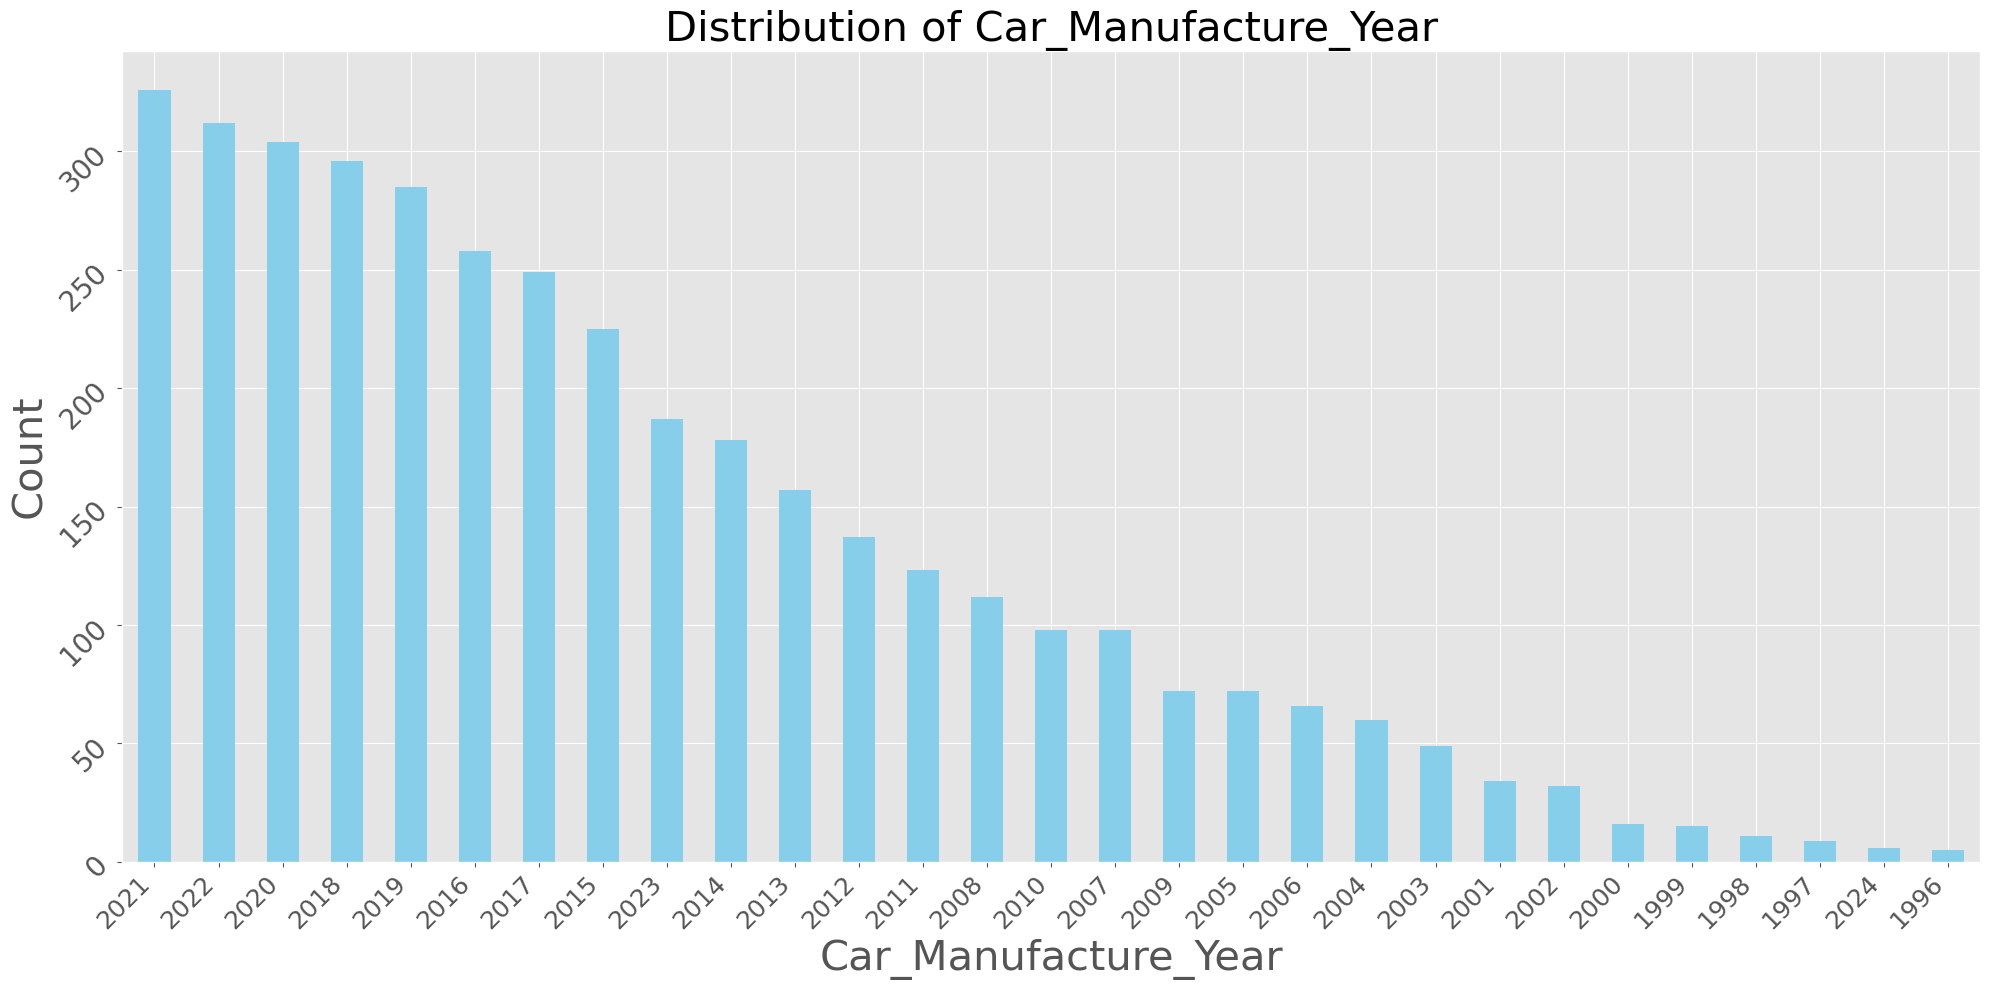

In [45]:
#Distribution of Car_Manufacture_Year
mplt.figure(figsize=(20, 10))
my_used_car_data_df["Car_Manufacture_Year"].value_counts().plot(kind= "bar",color="skyblue")
mplt.title("Distribution of Car_Manufacture_Year",fontsize=30)
mplt.xlabel("Car_Manufacture_Year",fontsize=30)
mplt.ylabel("Count",fontsize=30)
mplt.xticks(rotation=45, ha="right", fontsize=18) 
mplt.yticks(rotation=45, ha="right", fontsize=20)  
mplt.tight_layout()
mplt.show()

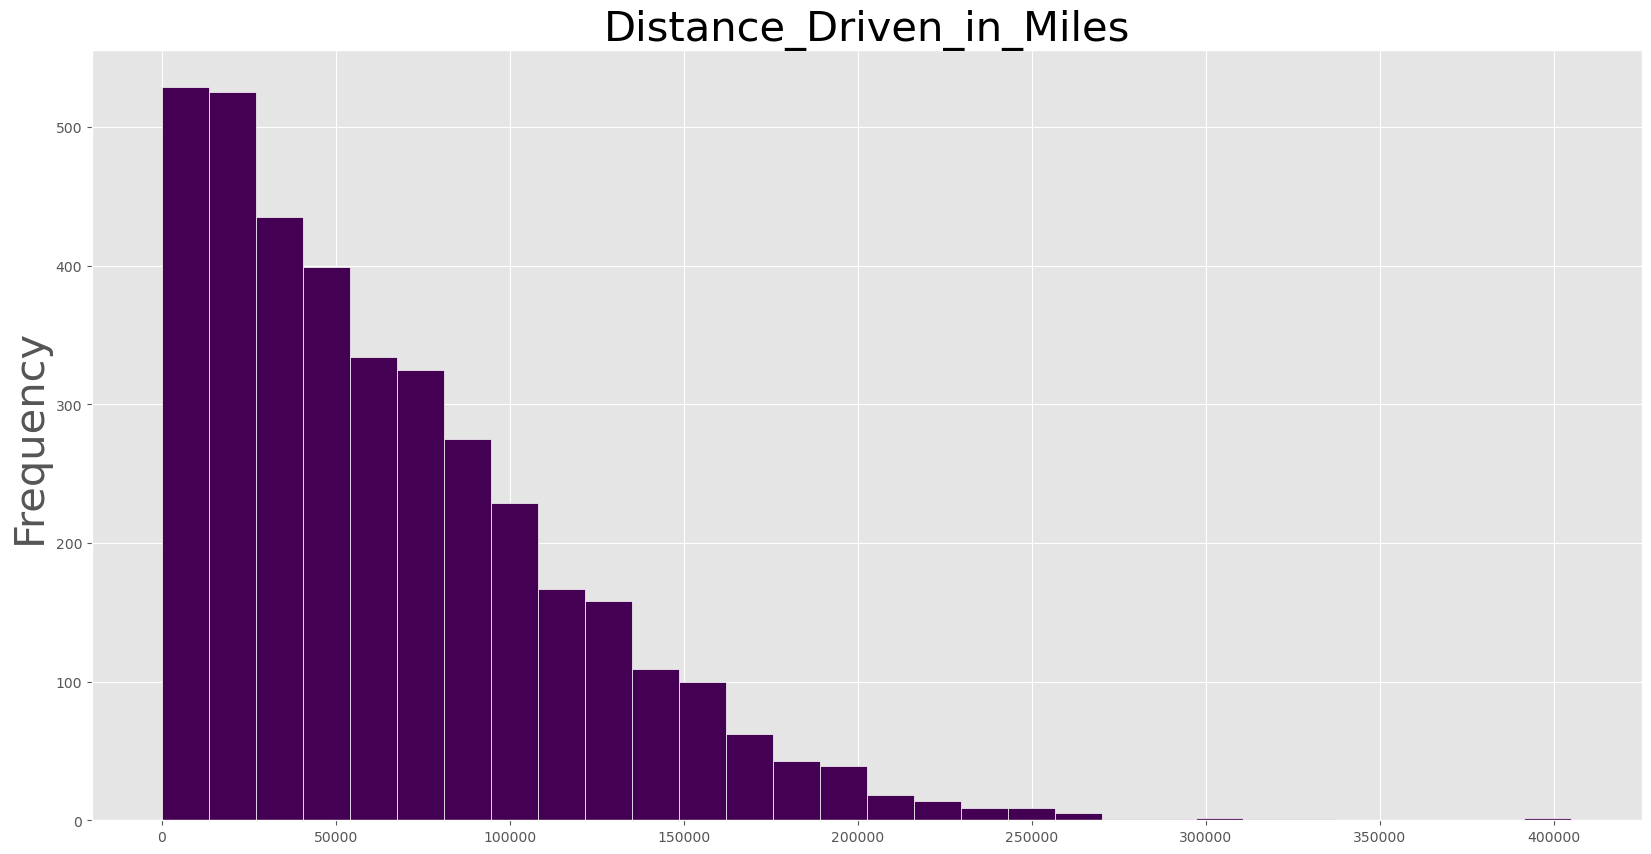

In [46]:
#Distribution of Distance_Driven_in_Miles
mplt.figure(figsize=(20, 10))
mplt.hist(my_used_car_data_df["Distance_Driven_in_Miles"],bins=30,color="#440154",edgecolor="white")
mplt.title("Distance_Driven_in_Miles",fontsize=30)
mplt.ylabel("Frequency",fontsize=30)
mplt.show()

In [47]:
my_used_car_data_unique_values = my_used_car_data_df.nunique()
my_used_car_data_dtypes = my_used_car_data_df.dtypes
my_used_car_data_unique_dtype = pnd.DataFrame({"nunique":my_used_car_data_unique_values,
                                              "dtypes":my_used_car_data_dtypes})
my_used_car_data_unique_dtype

nunique  dtypes
Car_Manufacture                52  object
Car_Model                    1800  object
Car_Manufacture_Year           29   int64
Distance_Driven_in_Miles     2686   int64
Car_Fuel_Category               5  object
Car_Engine_Type              1095  object
Car_Gear_System                58  object
Car_Color                     308  object
Car_Interior_Color            153  object
Car_Accident_Status             2  object
Car_Title_Status                2  object
Car_Price_in_Dollors         1523   int64

In [48]:
my_used_car_data_df.describe(include="all")

Car_Manufacture Car_Model  Car_Manufacture_Year  \
count             3792      3792           3792.000000   
unique              52      1800                   NaN   
top                BMW   M3 Base                   NaN   
freq               370        30                   NaN   
mean               NaN       NaN           2015.456487   
std                NaN       NaN              5.852509   
min                NaN       NaN           1996.000000   
25%                NaN       NaN           2012.000000   
50%                NaN       NaN           2017.000000   
75%                NaN       NaN           2020.000000   
max                NaN       NaN           2024.000000   

        Distance_Driven_in_Miles Car_Fuel_Category  \
count                3792.000000              3792   
unique                       NaN                 5   
top                          NaN          Gasoline   
freq                         NaN              3309   
mean                66114.991297               NaN   
std                 52349.624900               NaN   
min                   100.000000               NaN   
25%                 24263.250000               NaN   
50%                 54390.000000               NaN   
75%                 95500.000000               NaN   
max                405000.000000               NaN   

                   Car_Engine_Type Car_Gear_System Car_Color  \
count                         3792            3792      3792   
unique                        1095              58       308   
top     2.0L I4 16V GDI DOHC Turbo             A/T     Black   
freq                            52             934       867   
mean                           NaN             NaN       NaN   
std                            NaN             NaN       NaN   
min                            NaN             NaN       NaN   
25%                            NaN             NaN       NaN   
50%                            NaN             NaN       NaN   
75%                            NaN             NaN       NaN   
max                            NaN             NaN       NaN   

       Car_Interior_Color Car_Accident_Status Car_Title_Status  \
count                3792                3792             3792   
unique                153                   2                2   
top                 Black       None reported              Yes   
freq                 1919                2825             3223   
mean                  NaN                 NaN              NaN   
std                   NaN                 NaN              NaN   
min                   NaN                 NaN              NaN   
25%                   NaN                 NaN              NaN   
50%                   NaN                 NaN              NaN   
75%                   NaN                 NaN              NaN   
max                   NaN                 NaN              NaN   

        Car_Price_in_Dollors  
count           3.792000e+03  
unique                   NaN  
top                      NaN  
freq                     NaN  
mean            4.423179e+04  
std             8.012376e+04  
min             2.000000e+03  
25%             1.700000e+04  
50%             3.000000e+04  
75%             4.900000e+04  
max             2.954083e+06

<h2 style="color:#9d36eb;">Step 3: Feature Engineering</h2>

<h3>Data Quality Issues Identified:</h3>

**Modification Required** 

**High Cardinality** 

**Mixed Data Types**

**Outliers**

In [51]:
#Car_Manufacture
my_used_car_data_df["Car_Manufacture"].value_counts().to_frame().transpose()


Car_Manufacture  BMW  Ford  Mercedes-Benz  Chevrolet  Audi  Toyota  Porsche  \
count            370   369            310        284   194     193      190   

Car_Manufacture  Lexus  Jeep  Land  Nissan  Cadillac  RAM  GMC  Dodge  Kia  \
count              163   142   130     108       103   91   89     82   72   

Car_Manufacture  Hyundai  Subaru  Honda  Acura  Mazda  INFINITI  Volkswagen  \
count                 69      64     62     62     60        59          56   

Car_Manufacture  Lincoln  Jaguar  Volvo  Maserati  Bentley  MINI  Buick  \
count                 52      46     36        34       33    33     30   

Car_Manufacture  Lamborghini  Chrysler  Mitsubishi  Genesis  Alfa  Hummer  \
count                     26        25          20       20    19      16   

Car_Manufacture  Pontiac  Ferrari  Rolls-Royce  Aston  Scion  McLaren  Saturn  \
count                 15       12           10      9      6        6       5   

Car_Manufacture  Lotus  FIAT  Saab  Mercury  Bugatti  Plymouth  smart  \
count                4     4     2        2        1         1      1   

Car_Manufacture  Maybach  Suzuki  
count                  1       1

In [52]:
#Binning the Car Manufacture in to  4 Trading categories
Car_Trading_Categories = {

    "Elite_Luxury": [
        "BMW", "Mercedes-Benz", "Audi", "Porsche", "Lexus", "Jaguar",
        "Maserati", "Bentley", "Rolls-Royce", "Ferrari", "Lamborghini",
        "Bugatti", "Maybach", "McLaren","Aston","Land", "Genesis"],
    
    "High-End_Premium": [
        "Ford", "Chevrolet", "Toyota", "Cadillac", "INFINITI", "Lincoln",
        "Acura", "Nissan", "Volkswagen","Kia", "Chrysler","Lotus"],
    
    "Mid-Tier": [
        "Honda", "Hyundai", "Subaru", "Mazda", "GMC", "RAM", "Dodge", "Buick",
        "Jeep", "Volvo","Saab"],
    
    "Budget-friendly_Economy": [
        "Mitsubishi", "Scion", "FIAT", "Hummer", "Saturn", "Pontiac",
        "Suzuki", "MINI", "Alfa","Scion", "Mercury", "Plymouth", "smart"]
}

#Function to assing the catergories to correspondig values.
def assigning_trading_categories(car_make):
    for Trading_Category, car_makes in Car_Trading_Categories.items():
        if car_make in car_makes:
            #print(Trading_Category)
            #print(car_make)
            return Trading_Category
    #print(f"DEBUG: {car_make} not found in any category")
    return "Failed"

my_used_car_data_df["Car_Trading_Category"] =my_used_car_data_df["Car_Manufacture"].apply(assigning_trading_categories)

In [53]:
#Grouping and Encoding the Car_Fuel_Category in to two types
#Internal_Combustion _Engine_Vehicle(ICEVs): Gasoline, Diesel
#Flex_Fuel_Vechicle_(FFVs): E85 Flex Fuel
#Hybrid_Vechiels_(HEVs): Hybrid, Plug-In Hybrid
my_used_car_data_df["Car_Fuel_Type_Category"] = my_used_car_data_df["Car_Fuel_Category"].copy()
my_used_car_data_df["Car_Fuel_Type_Category"] = my_used_car_data_df["Car_Fuel_Type_Category"].replace(["Gasoline","Diesel"],"ICEVs").replace(["Hybrid", "Plug-In Hybrid"],"HEVs").replace(["E85 Flex Fuel"],"FFVs")

In [54]:
print(my_used_car_data_df["Car_Trading_Category"].value_counts().to_frame())
print()
print(my_used_car_data_df["Car_Fuel_Type_Category"].value_counts().to_frame())

                         count
Car_Trading_Category          
Elite_Luxury              1555
High-End_Premium          1387
Mid-Tier                   727
Budget-friendly_Economy    123

                        count
Car_Fuel_Type_Category       
ICEVs                    3425
HEVs                      228
FFVs                      139


In [55]:
#Car_Gear_System
my_used_car_data_df["Car_Gear_System"].value_counts().to_frame().transpose()

Car_Gear_System  A/T  8-Speed A/T  Transmission w/Dual Shift Mode  \
count            934          405                             396   

Car_Gear_System  6-Speed A/T  6-Speed M/T  Automatic  7-Speed A/T  \
count                    362          243        226          209   

Car_Gear_System  8-Speed Automatic  10-Speed A/T  5-Speed A/T  \
count                          176           119           85   

Car_Gear_System  6-Speed Automatic  9-Speed A/T  4-Speed A/T  \
count                           73           72           68   

Car_Gear_System  CVT Transmission  10-Speed Automatic  5-Speed M/T  \
count                          62                  56           53   

Car_Gear_System  9-Speed Automatic  M/T  Automatic CVT  \
count                           47   40             37   

Car_Gear_System  7-Speed Automatic with Auto-Shift  7-Speed M/T  \
count                                           24           10   

Car_Gear_System  5-Speed Automatic  8-Speed Automatic with Auto-Shift  \
count                            9                                  9   

Car_Gear_System  6-Speed Manual  7-Speed Automatic  \
count                         8                  7   

Car_Gear_System  Transmission Overdrive Switch  \
count                                        7   

Car_Gear_System  6-Speed Automatic with Auto-Shift  Variable  \
count                                            5         4   

Car_Gear_System  4-Speed Automatic  Automatic, 8-Spd  2  1-Speed Automatic  –  \
count                            4                 4  3                  3  2   

Car_Gear_System  F  Manual, 6-Spd  7-Speed Manual  Manual  \
count            2              2               2       2   

Car_Gear_System  Automatic, 9-Spd 9G-Tronic  CVT-F  8-SPEED AT  \
count                                     2      1           1   

Car_Gear_System  Auto, 6-Spd w/CmdShft  \
count                                1   

Car_Gear_System  Automatic, 8-Spd Sport w/Sport & Manual Modes  \
count                                                        1   

Car_Gear_System  Automatic, 8-Spd PDK Dual-Clutch  \
count                                           1   

Car_Gear_System  Automatic, 8-Spd M STEPTRONIC w/Drivelogic, Sport & Manual Modes  \
count                                                            1                  

Car_Gear_System  6-Speed  Automatic, 8-Spd Dual-Clutch  Automatic, 10-Spd  \
count                  1                             1                  1   

Car_Gear_System  7-Speed  Automatic, 7-Spd S tronic Dual-Clutch  \
count                  1                                      1   

Car_Gear_System  6-Speed Electronically Controlled Automatic with O  \
count                                                            1    

Car_Gear_System  6 Speed At/Mt  8-SPEED A/T  \
count                        1            1   

Car_Gear_System  10-Speed Automatic with Overdrive  7-Speed DCT Automatic  \
count                                            1                      1   

Car_Gear_System  9-Speed Automatic with Auto-Shift  \
count                                            1   

Car_Gear_System  SCHEDULED FOR OR IN PRODUCTION  6 Speed Mt  8-Speed Manual  
count                                         1           1               1

In [56]:
#Grouping and Encoding the Car_Gear_System in to two types
#Automatic
#Manual

def encoding_gear_system(gear_system):
    if "Auto" in gear_system or "Automatic" in gear_system or "AT" in gear_system or "A/T" in gear_system or "CVT" in gear_system:
        return "Automatic"
    elif "Manual" in gear_system or "Mt" in gear_system or "M/T" in gear_system or "Dual Shift Mode" in gear_system:
        return "Manual"
    return "Manual" #As common gear system 

def encoding_gear_count(gear_system):
    Speed_word = re.search(r"(\d+)-Speed", gear_system)
    SPEED_word = re.search(r"(\d+)-SPEED", gear_system)
    Spd_word = re.search(r"(\d+)-Spd", gear_system)
    if Speed_word:
        return int(Speed_word.group(1))
    elif Spd_word:
        return int(Spd_word.group(1))
    elif SPEED_word:
        return int(SPEED_word.group(1))
    else: return 5 #As Standard Gears
my_used_car_data_df["Car_Transmission_Gear_System_Type"] = my_used_car_data_df["Car_Gear_System"].apply(encoding_gear_system)
my_used_car_data_df["Car_Transmission_Gear_Count"] = my_used_car_data_df["Car_Gear_System"].apply(encoding_gear_count)

In [57]:
print(my_used_car_data_df["Car_Transmission_Gear_System_Type"].value_counts().to_frame())
print()
print(my_used_car_data_df["Car_Transmission_Gear_Count"].value_counts().to_frame())

                                   count
Car_Transmission_Gear_System_Type       
Automatic                           3012
Manual                               780

                             count
Car_Transmission_Gear_Count       
5                             1866
6                              696
8                              601
7                              255
10                             177
9                              122
4                               72
1                                3


In [58]:
#Extracting Horse power from - Car Engine Type
def Horse_power(engine_data):
    format = [
        r"(\d+\.?\d*) ?PS",
        r"(\d+\.?\d*) ?HP",
        r"(\d+\.?\d*) ?Hp",
        r"(\d+\.?\d*) ?horsepower",
        r"(\d+\.?\d*) ?hp",
        r"(\d+\.?\d*) ?[hH][pP]",
    ]
    
    for data in format:
        search = re.search(data, engine_data)
        if search:
            return float(search.group(1))
    return None
my_used_car_data_df["Car_Engine_HP"] = my_used_car_data_df["Car_Engine_Type"].apply(Horse_power)
#Replacing None Value with Median
my_used_car_data_df["Car_Engine_HP"] = my_used_car_data_df["Car_Engine_HP"].replace(npy.nan,my_used_car_data_df["Car_Engine_HP"].median())


In [59]:
#Binning the Car Body Color in to  6 color categories
Car_Color_Categories = {"Red":"Red","Blue":"Blue", 
                        "Black":"Black", "White":"White",
                        "Silver":"Silver", "Other-Color":"Other-Color"}
def assigning_color_categories(car_color):
    for Color_Category, body_color in Car_Color_Categories.items():
        search = re.search(body_color, car_color, re.IGNORECASE)
        if search:
            return Color_Category
        
    return "Other-Color"

my_used_car_data_df["Car_Color_Category"] =my_used_car_data_df["Car_Color"].apply(assigning_color_categories)

<h3>Computing Age of the Vehicle as of 2024

In [61]:

Current_Year_for_Vehicle_Age = 2024
my_used_car_data_df["Car_Age_in_Years"] = Current_Year_for_Vehicle_Age - my_used_car_data_df["Car_Manufacture_Year"]

<h3>Computing Resale price</h3>
Resale price = Original Price × (1 - Depreciation Rate) ^ Age



<li>I am assuming the Depreciation Rate for the cars are:

<h2 style="text-align: center;">Car Depreciation Rates</h2>

<table style="width: 50%; margin: auto; border-collapse: collapse; border: 1px solid #ddd; font-family: Arial, sans-serif;">
    <tr>
        <th style="padding: 12px; text-align: left; border-bottom: 1px solid #ddd; background-color: #f2f2f2;">Car Category</th>
        <th style="padding: 12px; text-align: left; border-bottom: 1px solid #ddd; background-color: #f2f2f2;">Depreciation Rate</th>
    </tr>
    <tr>
        <td style="padding: 12px; border-bottom: 1px solid #ddd;">Elite Luxury</td>
        <td style="padding: 12px; border-bottom: 1px solid #ddd;">20%</td>
    </tr>
    <tr>
        <td style="padding: 12px; border-bottom: 1px solid #ddd;">High-End Premium</td>
        <td style="padding: 12px; border-bottom: 1px solid #ddd;">18%</td>
    </tr>
    <tr>
        <td style="padding: 12px; border-bottom: 1px solid #ddd;">Mid-Tier</td>
        <td style="padding: 12px; border-bottom: 1px solid #ddd;">15%</td>
    </tr>
    <tr>
        <td style="padding: 12px; border-bottom: 1px solid #ddd;">Budget-friendly Economy</td>
        <td style="padding: 12px; border-bottom: 1px solid #ddd;">10%</td>
    </tr>
</table>




In [63]:
my_used_car_data_df["Car_Depreciation_Rate"] = my_used_car_data_df["Car_Trading_Category"].replace("Elite_Luxury",0.2).replace("High-End_Premium",0.18).replace("Mid-Tier",0.15).replace("Budget-friendly_Economy",0.10)
my_used_car_data_df["Car_Depreciation_Rate"].astype("float")

my_used_car_data_df["Car_Resale_Price_in_Dollors"] = my_used_car_data_df["Car_Price_in_Dollors"] * (1-my_used_car_data_df["Car_Depreciation_Rate"])** my_used_car_data_df["Car_Age_in_Years"]
my_used_car_data_df["Car_Resale_Price_in_Dollors"].round(2)
my_used_car_data_df["Car_Resale_Price_in_Dollors"] = my_used_car_data_df["Car_Resale_Price_in_Dollors"].astype("int")

<h2>Encoding of Categorical Variables</h2>

In [65]:
#Label Encoding for Car_Trading_Category
my_used_car_data_df["Car_Trading_Category"] = my_used_car_data_df["Car_Trading_Category"].map({
        "Elite_Luxury":3,
        "High-End_Premium":2,
        "Mid-Tier" : 1,
        "Budget-friendly_Economy" : 0
})

#One Hot Encoding for Car_Fuel_type_Category
my_used_car_data_df = pnd.get_dummies(my_used_car_data_df, columns = ["Car_Fuel_Type_Category"],drop_first = False)

#One Hot Encoding for Car_Transmission_Gear_System_Type
my_used_car_data_df = pnd.get_dummies(my_used_car_data_df, columns = ["Car_Transmission_Gear_System_Type"],drop_first = False)

#One Hot Encoding for Car_Color_Category
my_used_car_data_df = pnd.get_dummies(my_used_car_data_df, columns = ["Car_Color_Category"],drop_first = False)

#One Hot Encoding for Car_Accident_Status
my_used_car_data_df = pnd.get_dummies(my_used_car_data_df, columns = ["Car_Accident_Status"],drop_first = False)

#One Hot Encoding for Car_Title_Status
my_used_car_data_df = pnd.get_dummies(my_used_car_data_df, columns = ["Car_Title_Status"],drop_first = False)


In [66]:
#Droping the Categorical Orginal Column

my_used_car_data_df= my_used_car_data_df.drop(columns = ["Car_Manufacture",
                                                         "Car_Model",
                                                         "Car_Fuel_Category",
                                                         "Car_Engine_Type",
                                                         "Car_Gear_System",
                                                         "Car_Color",
                                                         "Car_Interior_Color",
                                                        ], axis=1)
#print(my_used_car_data_df.isna().sum())
my_used_car_data_df.tail()

Car_Manufacture_Year  Distance_Driven_in_Miles  Car_Price_in_Dollors  \
4003                  2018                     53705                 25900   
4004                  2023                       714                349950   
4005                  2022                     10900                 53900   
4007                  2020                     33000                 62999   
4008                  2020                     43000                 40000   

      Car_Trading_Category  Car_Transmission_Gear_Count  Car_Engine_HP  \
4003                     3                            5          241.0   
4004                     3                            8          310.0   
4005                     3                            5          349.0   
4007                     2                            5          450.0   
4008                     3                            5          248.0   

      Car_Age_in_Years  Car_Depreciation_Rate  Car_Resale_Price_in_Dollors  \
4003                 6                   0.20                         6789   
4004                 1                   0.20                       279960   
4005                 2                   0.20                        34496   
4007                 4                   0.18                        28483   
4008                 4                   0.20                        16384   

      Car_Fuel_Type_Category_FFVs  Car_Fuel_Type_Category_HEVs  \
4003                        False                        False   
4004                        False                        False   
4005                        False                        False   
4007                        False                        False   
4008                        False                        False   

      Car_Fuel_Type_Category_ICEVs  \
4003                          True   
4004                          True   
4005                          True   
4007                          True   
4008                          True   

      Car_Transmission_Gear_System_Type_Automatic  \
4003                                         True   
4004                                         True   
4005                                        False   
4007                                         True   
4008                                         True   

      Car_Transmission_Gear_System_Type_Manual  Car_Color_Category_Black  \
4003                                     False                      True   
4004                                     False                     False   
4005                                      True                      True   
4007                                     False                     False   
4008                                     False                     False   

      Car_Color_Category_Blue  Car_Color_Category_Other-Color  \
4003                    False                           False   
4004                    False                            True   
4005                    False                           False   
4007                     True                           False   
4008                    False                            True   

      Car_Color_Category_Red  Car_Color_Category_Silver  \
4003                   False                      False   
4004                   False                      False   
4005                   False                      False   
4007                   False                      False   
4008                   False                      False   

      Car_Color_Category_White  \
4003                     False   
4004                     False   
4005                     False   
4007                     False   
4008                     False   

      Car_Accident_Status_At least 1 accident or damage reported  \
4003                                               True            
4004                                              False            
4005                                              False           

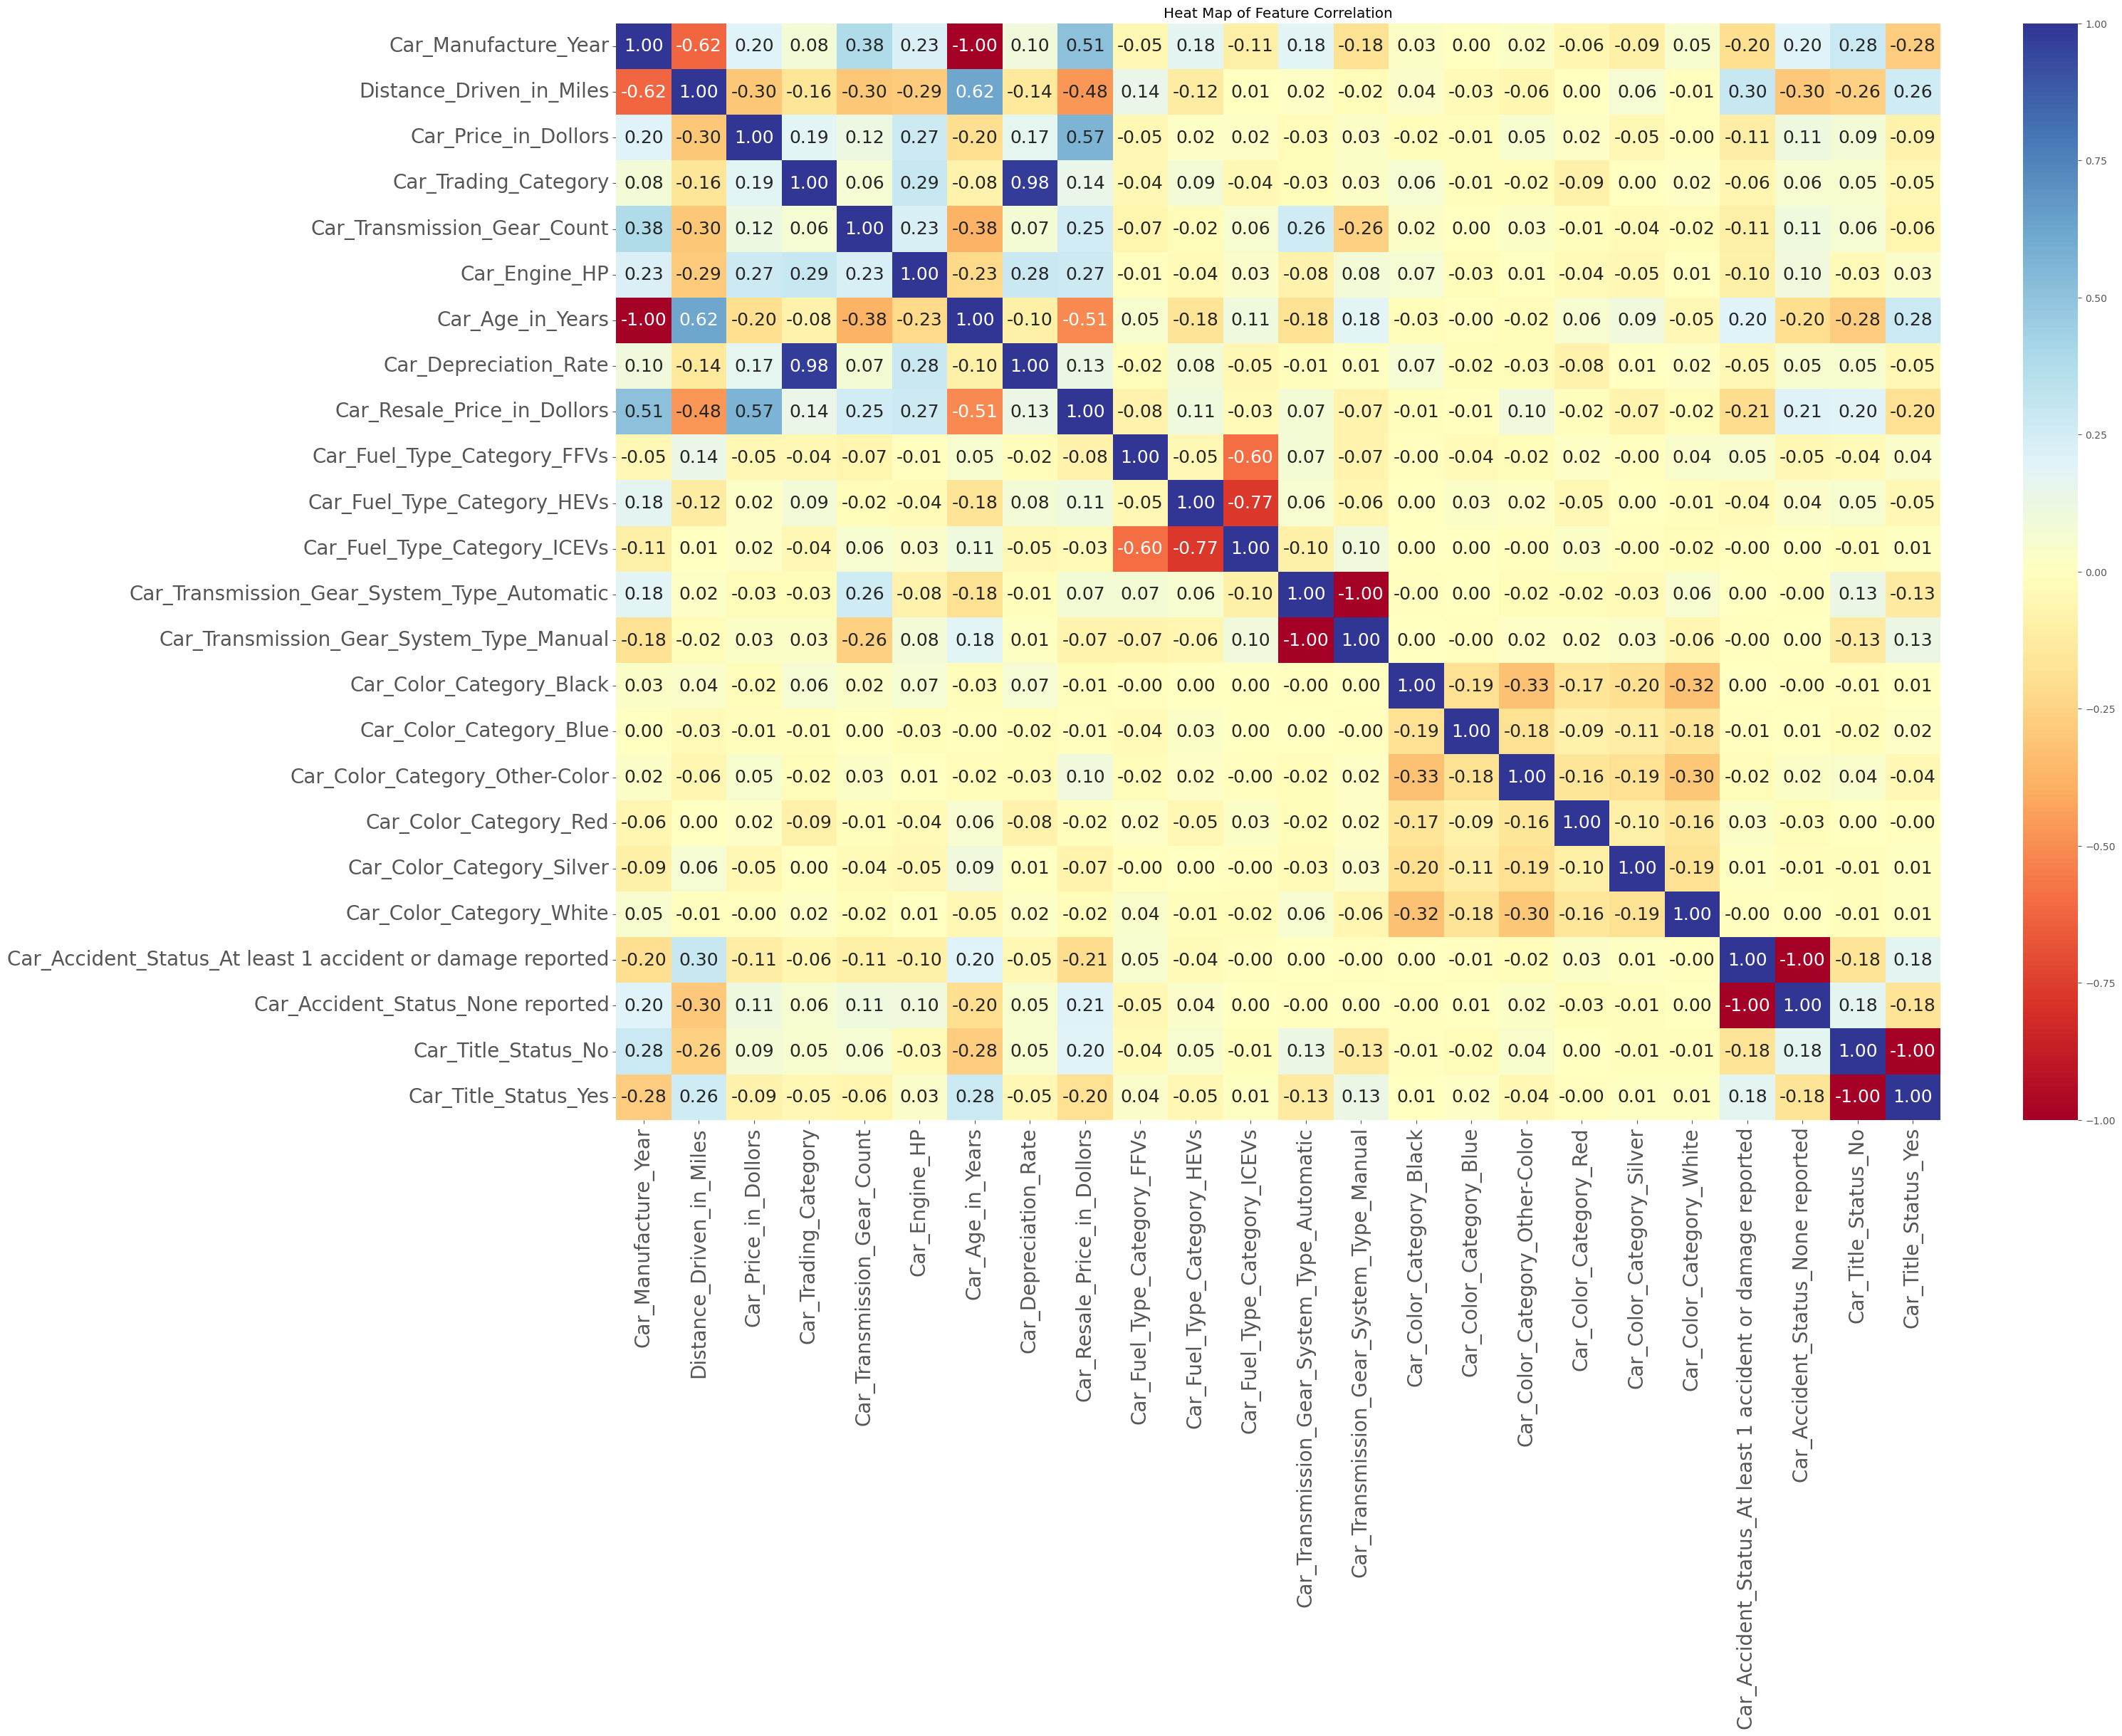

In [67]:
my_used_car_data_df_correlation =  my_used_car_data_df.corr()
mplt.figure(figsize=(30, 20))
sea.heatmap(my_used_car_data_df_correlation, annot=True, cmap="RdYlBu", fmt=".2f", annot_kws={"size": 18})
mplt.title("Heat Map of Feature Correlation")
mplt.xticks(fontsize=20) 
mplt.yticks(rotation=0,fontsize=20)  
mplt.show()

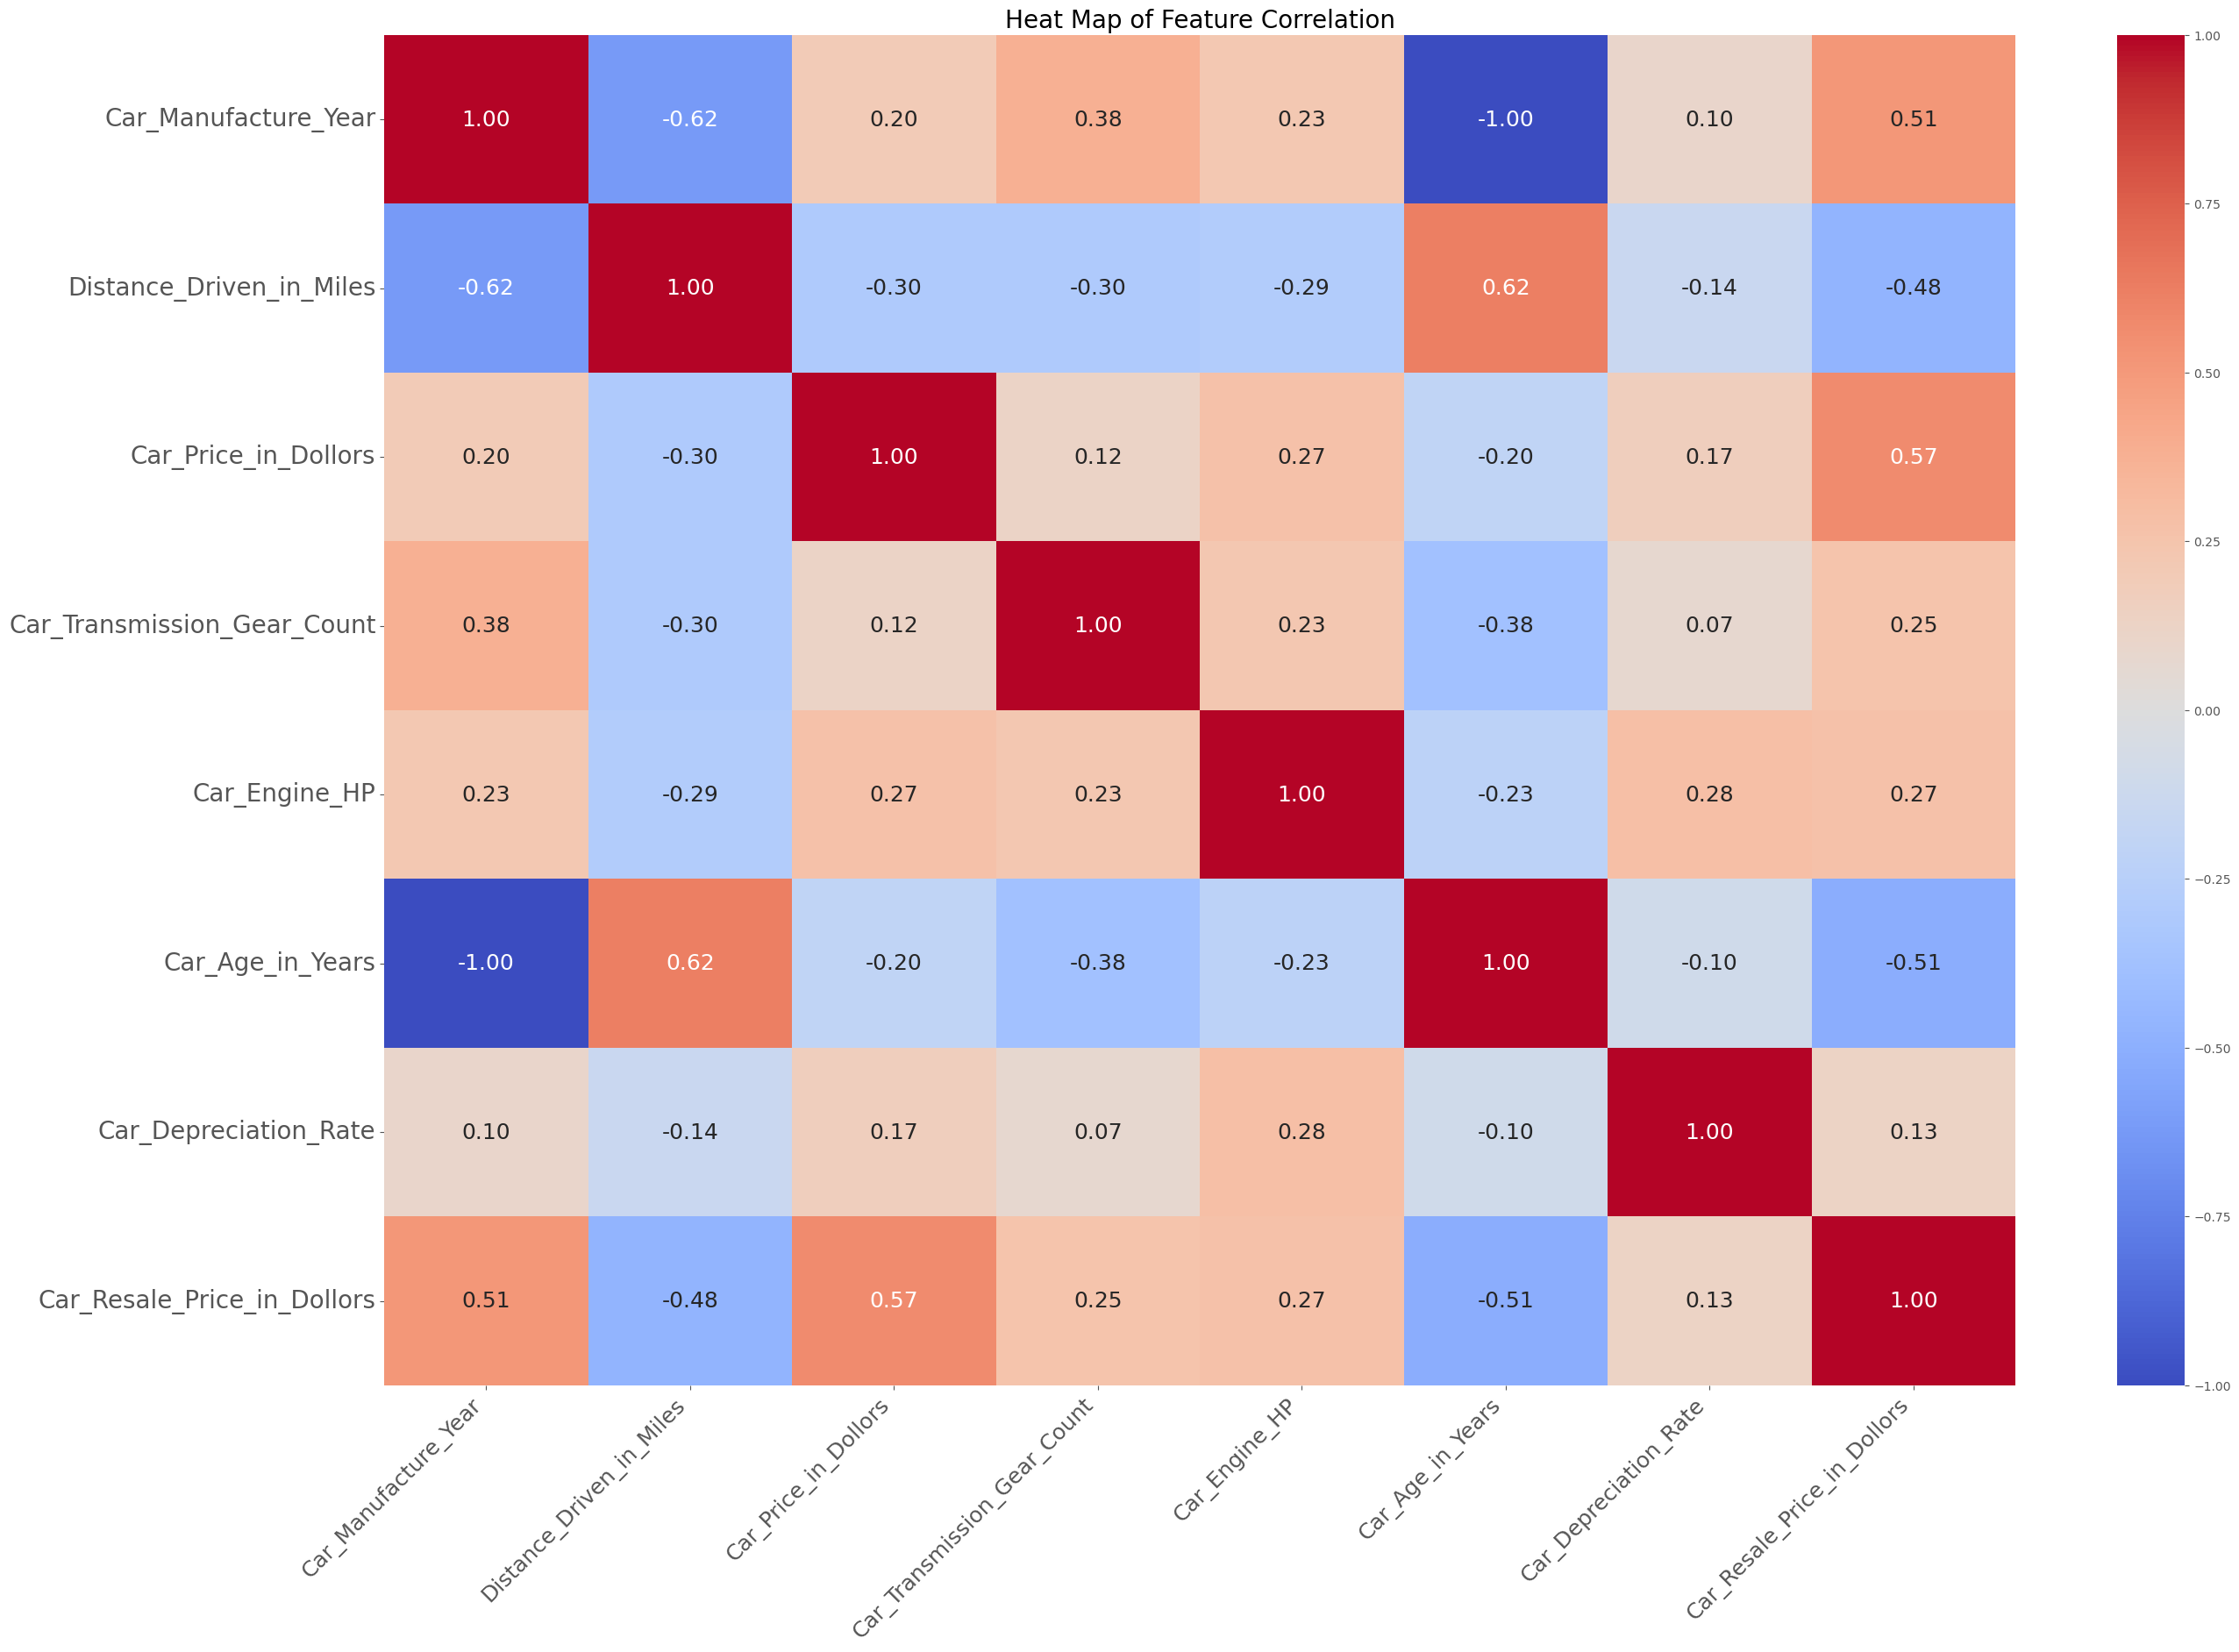

In [68]:
my_used_car_numerical_data_df_correlation =  my_used_car_data_df[["Car_Manufacture_Year","Distance_Driven_in_Miles",	"Car_Price_in_Dollors","Car_Transmission_Gear_Count",	"Car_Engine_HP","Car_Age_in_Years","Car_Depreciation_Rate","Car_Resale_Price_in_Dollors"]].corr()
mplt.figure(figsize=(30, 20))
sea.heatmap(my_used_car_numerical_data_df_correlation, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 18})
mplt.title("Heat Map of Feature Correlation",fontsize=20)
mplt.xticks(rotation=45, ha="right", fontsize=18) 
mplt.yticks(rotation=0,fontsize=20)  
mplt.show()

**Checking for Outliers**

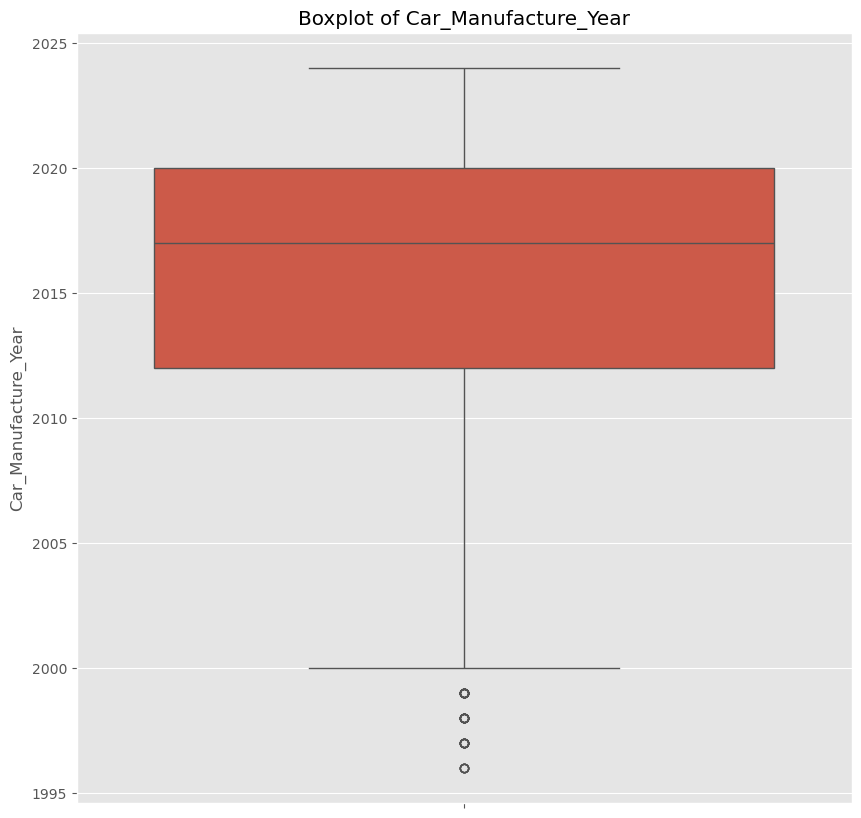

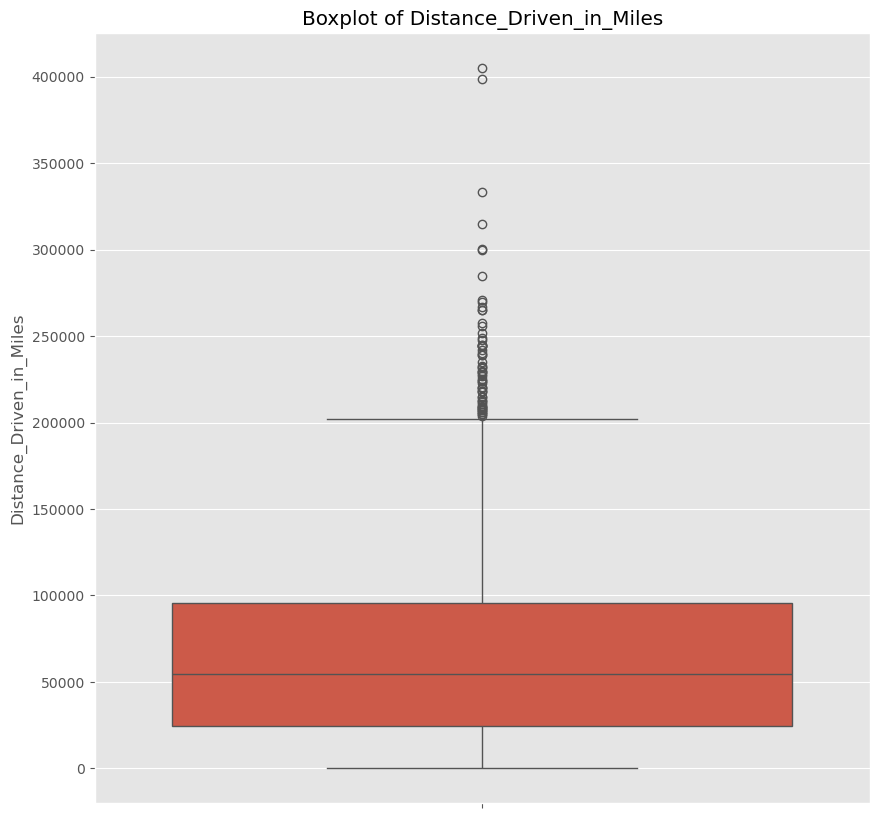

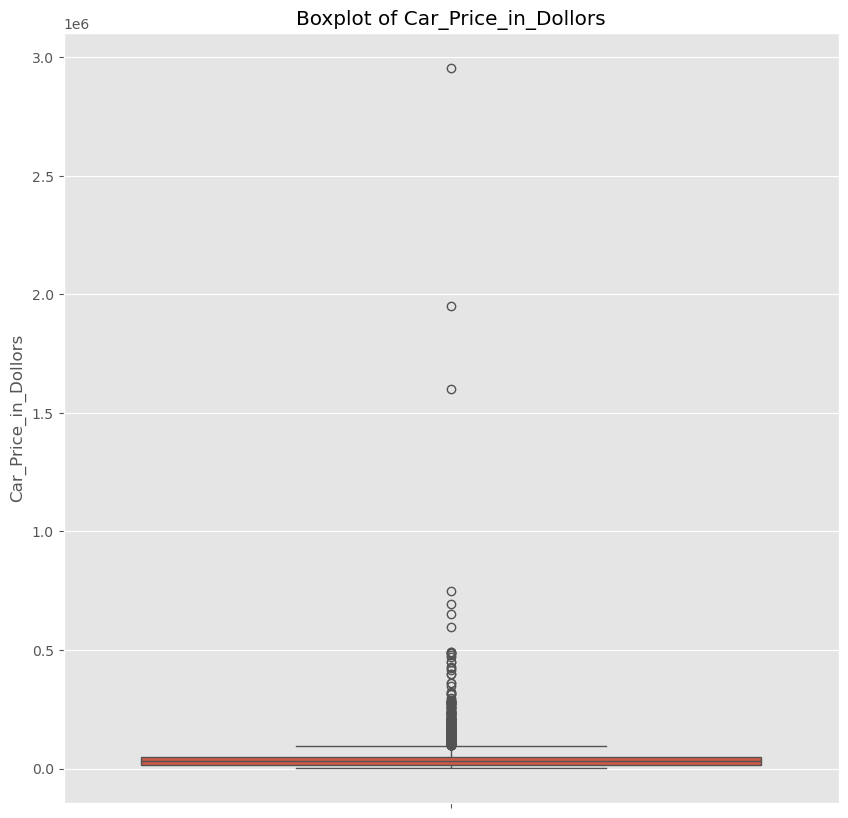

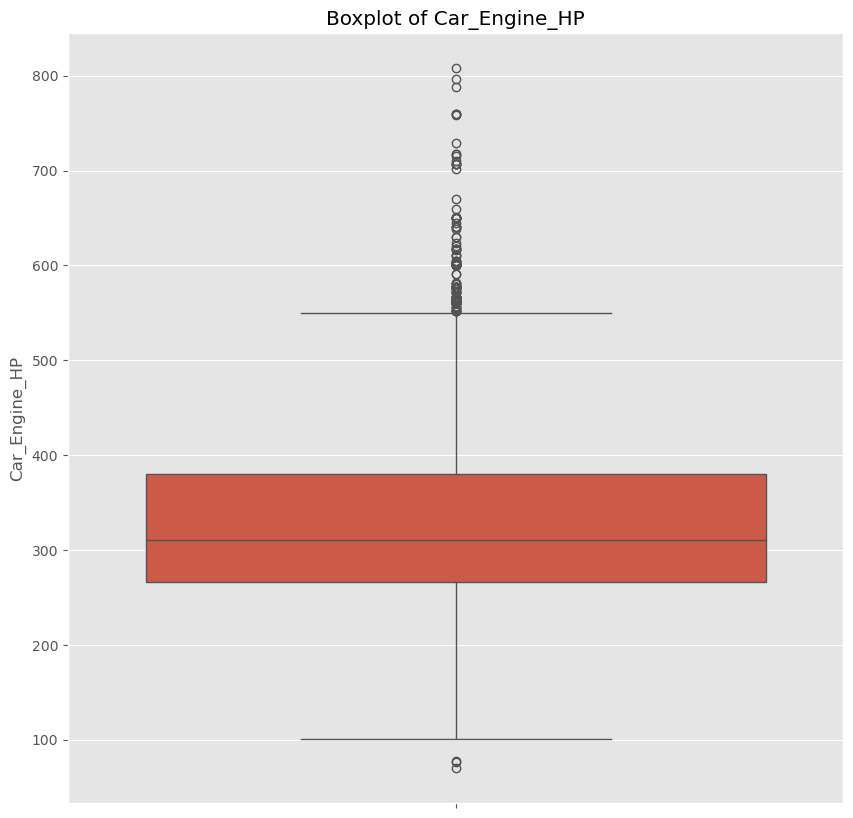

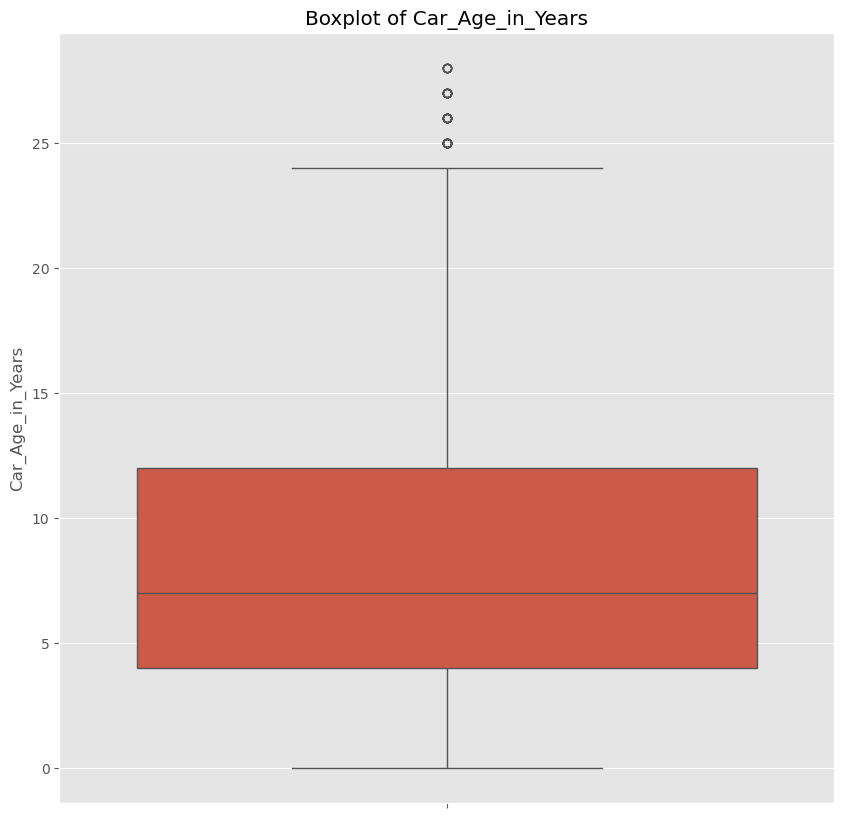

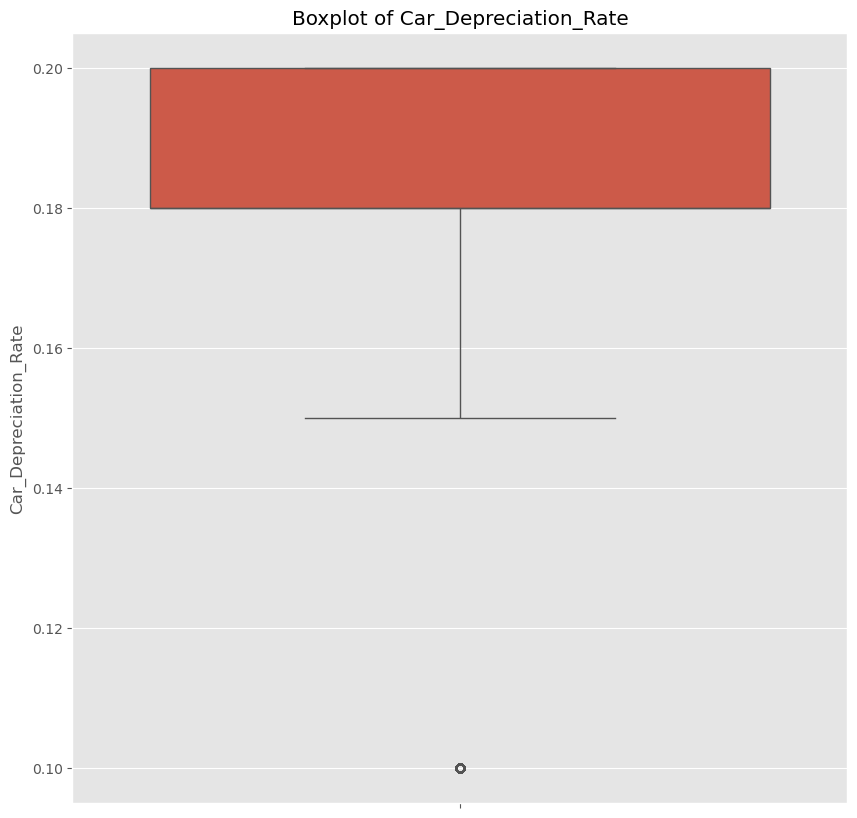

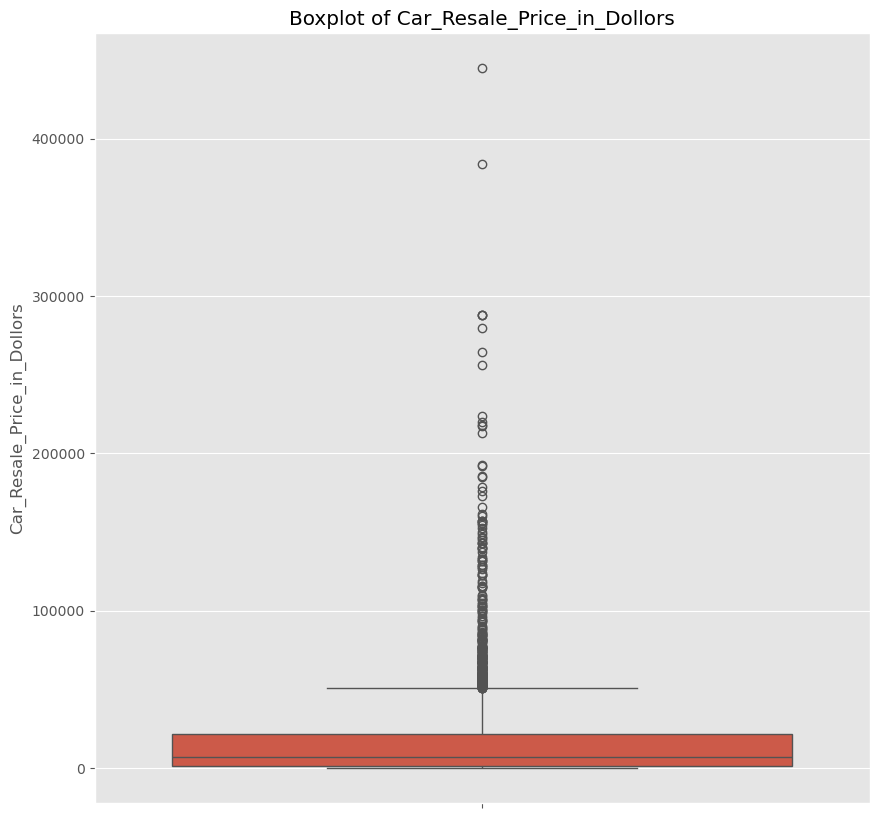

In [70]:
#Using BOX Plot  to visulize outliers

my_used_car_data_numerical_columns = ["Car_Manufacture_Year","Distance_Driven_in_Miles",	"Car_Price_in_Dollors",	"Car_Engine_HP","Car_Age_in_Years","Car_Depreciation_Rate","Car_Resale_Price_in_Dollors"]
for var_c in my_used_car_data_numerical_columns:
    mplt.figure(figsize=(10, 10))
    sea.boxplot(data = my_used_car_data_df[var_c])
    mplt.title(f"Boxplot of {var_c}")
    mplt.show()


**Pair-Plot**

<Figure size 640x480 with 0 Axes>

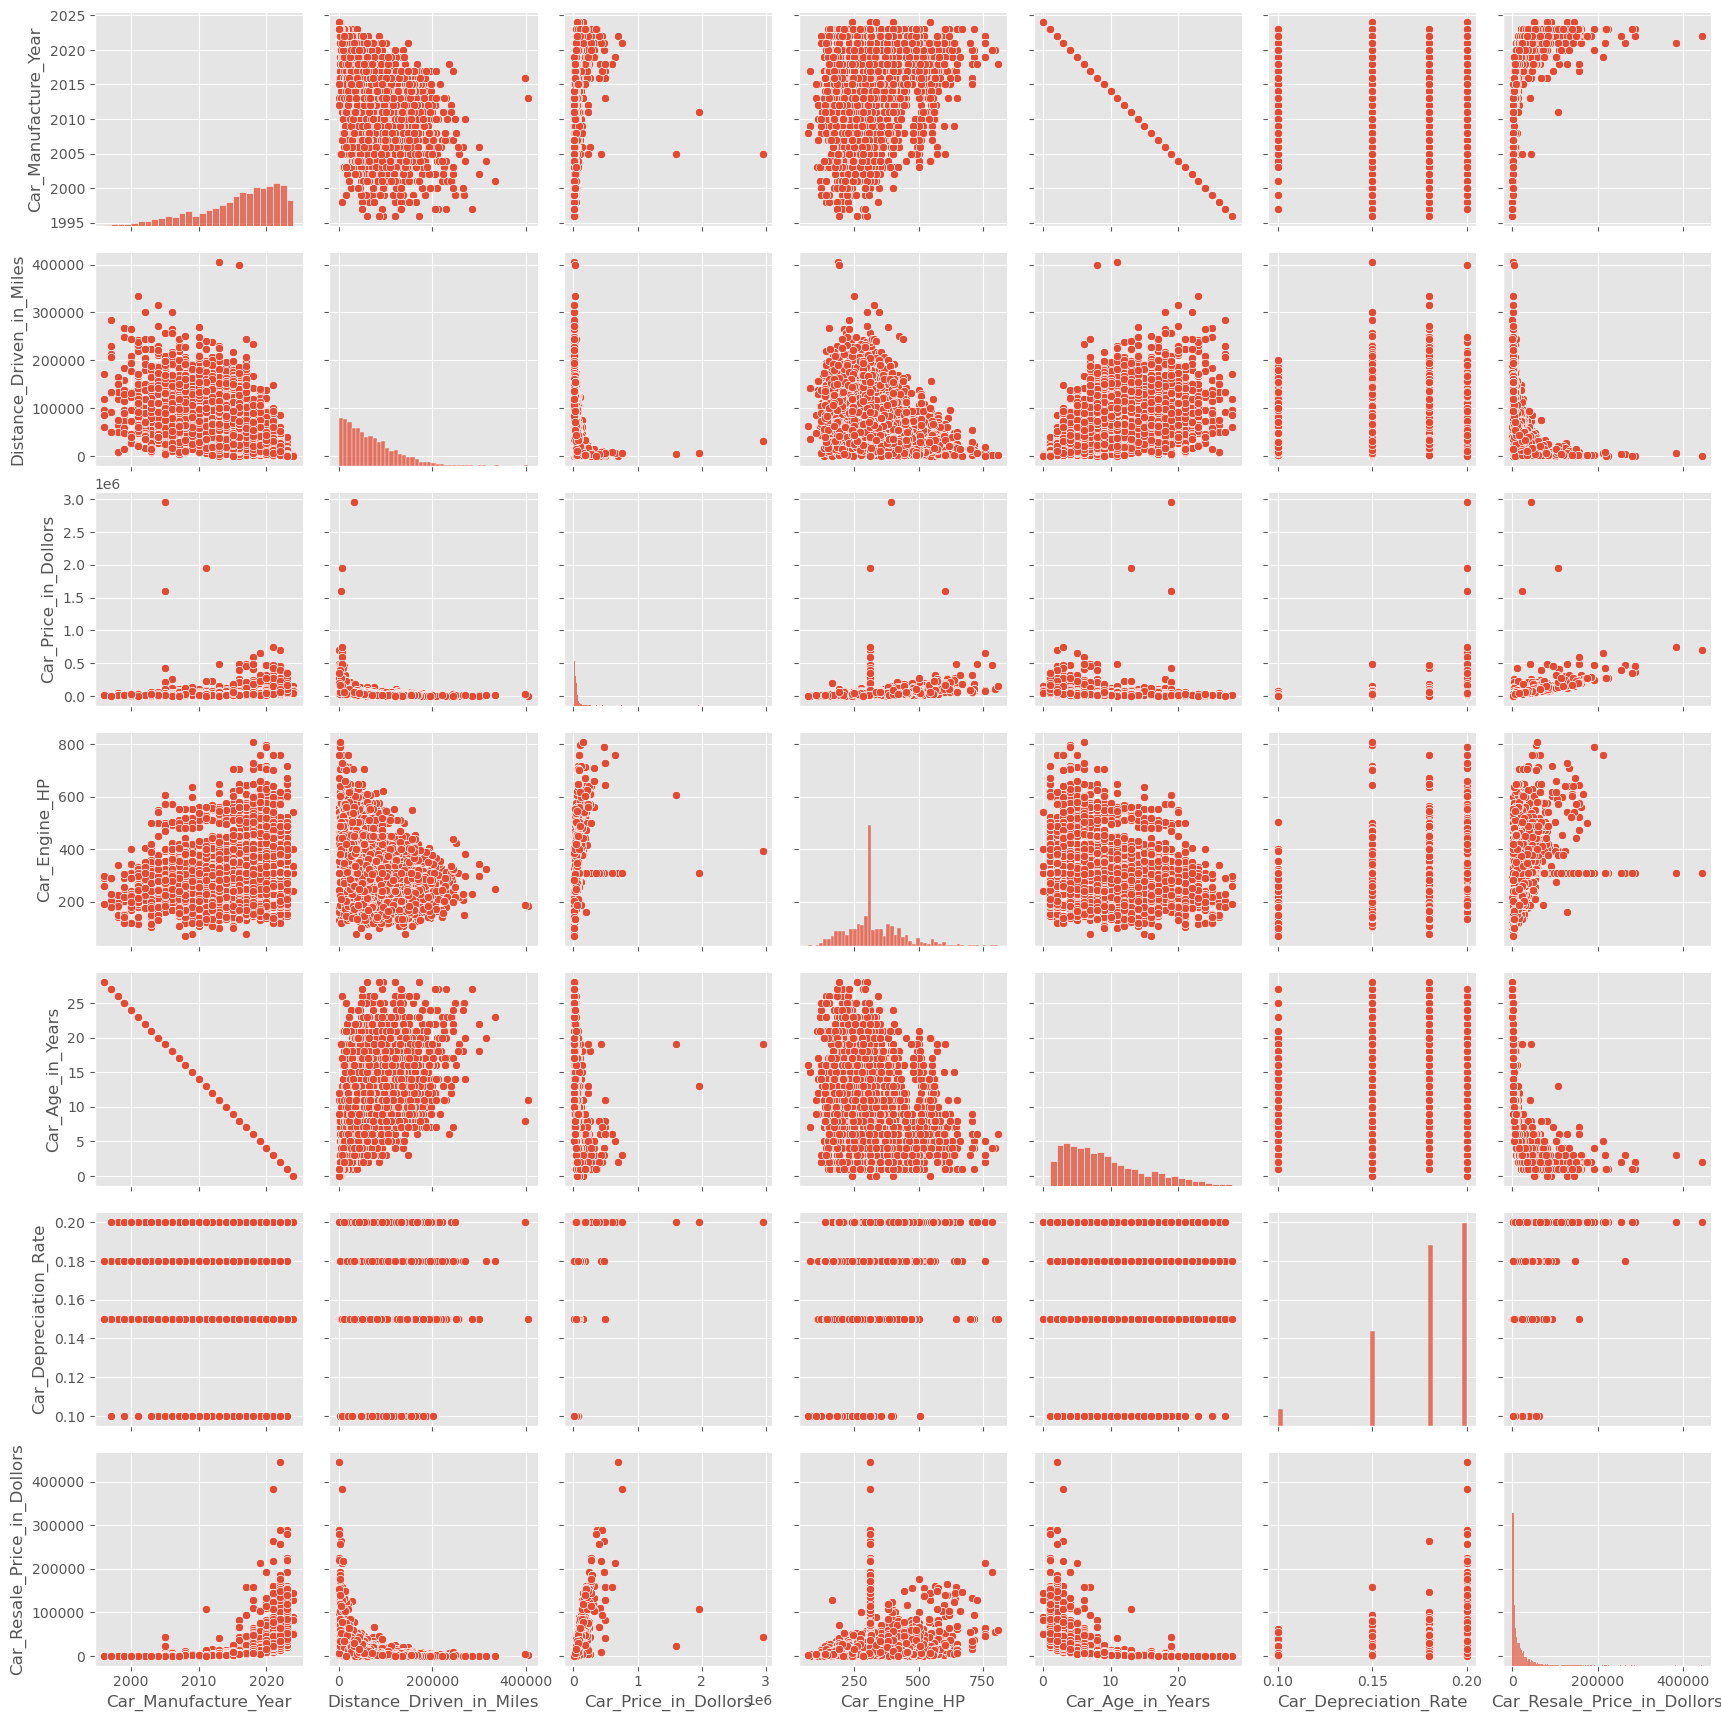

In [72]:
mplt.figure()
sea.pairplot(my_used_car_data_df[my_used_car_data_numerical_columns])
mplt.show()

<h2 style="color:#9d36eb;">Step 4: Model Building</h2>

**Feature Selection**

In [75]:
my_used_car_resale_price_feature_X = my_used_car_data_df.drop(["Car_Resale_Price_in_Dollors"], axis=1)
my_used_car_resale_price_feature_Y = my_used_car_data_df["Car_Resale_Price_in_Dollors"]

**Spliting the my_used_car_data_df dataset for train and test**

In [77]:
#UCD-Used car data
#Splitting Data set in to 70% for Training, 30 % for (Both Testing and Validating)
UCD_X_feature_train, UCD_X_feature_validate_test, UCD_Y_feature_train, UCD_Y_feature_validate_test = train_test_split(my_used_car_resale_price_feature_X,my_used_car_resale_price_feature_Y,test_size = 0.3,random_state = 42)

 # Splitting 30 % data in to 15% Validating and 15% for Unseen testing
UCD_X_feature_validate, UCD_X_feature_unseen, UCD_Y_feature_validate, UCD_Y_feature_unseen = train_test_split(UCD_X_feature_validate_test,UCD_Y_feature_validate_test,test_size = 0.5,random_state = 42)


In [78]:
#Shapes of Train and Test Split dataset
print(f" Traning Dataset size :{UCD_X_feature_train.shape}")
print(f" Test Dataset size :{UCD_X_feature_validate.shape}")
print(f" Unseen Test Dataset size :{UCD_X_feature_unseen.shape}")


 Traning Dataset size :(2654, 23)
 Test Dataset size :(569, 23)
 Unseen Test Dataset size :(569, 23)


<h3>Using Random Forest Model - For Feature Importance

In [80]:
my_used_car_resale_price_RFM = RandomForestRegressor(random_state=42)
my_used_car_resale_price_RFM.fit(UCD_X_feature_train,UCD_Y_feature_train)

#Feature importance
UCD_RFM_importances = my_used_car_resale_price_RFM.feature_importances_
UCD_Feature_name = UCD_X_feature_train.columns

UCD_RFM_feature_importance_df = pnd.DataFrame({"Feature": UCD_Feature_name, "Importance" : UCD_RFM_importances}) 
UCD_RFM_feature_importance_df = UCD_RFM_feature_importance_df.sort_values(by="Importance",ascending=False)

UCD_RFM_feature_importance_df

Feature  Importance
2                                Car_Price_in_Dollors    0.670078
0                                Car_Manufacture_Year    0.142120
6                                    Car_Age_in_Years    0.138563
1                            Distance_Driven_in_Miles    0.036931
17                          Car_Color_Category_Silver    0.002509
4                         Car_Transmission_Gear_Count    0.001909
5                                       Car_Engine_HP    0.001597
7                               Car_Depreciation_Rate    0.001149
11        Car_Transmission_Gear_System_Type_Automatic    0.001063
15                     Car_Color_Category_Other-Color    0.000870
3                                Car_Trading_Category    0.000849
12           Car_Transmission_Gear_System_Type_Manual    0.000553
14                            Car_Color_Category_Blue    0.000443
18                           Car_Color_Category_White    0.000338
13                           Car_Color_Category_Black    0.000323
21                                Car_Title_Status_No    0.000244
22                               Car_Title_Status_Yes    0.000185
16                             Car_Color_Category_Red    0.000138
19  Car_Accident_Status_At least 1 accident or dam...    0.000044
9                         Car_Fuel_Type_Category_HEVs    0.000042
20                  Car_Accident_Status_None reported    0.000031
10                       Car_Fuel_Type_Category_ICEVs    0.000019
8                         Car_Fuel_Type_Category_FFVs    0.000001

In [81]:
#Evaluating the Model
UCD_RFM_test_accuracy = my_used_car_resale_price_RFM.score(UCD_X_feature_validate_test,UCD_Y_feature_validate_test)
print(f"RFR_Model_Evaluation_Score: {UCD_RFM_test_accuracy:.3f}")

RFR_Model_Evaluation_Score: 0.977


**Since this RFR Model Score is 0.977, there is no need to drop any feature. And also the feature were droped and checked with 0.01 threshold. and the score was droped to 0.5**

<h3>Hyperparameter Tuning:

I will using the Models like Linear, ridge, lasso, polynomial regressions, decision tree, and random forest algorithms to identify the best fitting models.

I will use Gridsearch Cross Validation with 5 fold CV.

In [86]:
#Definging Models and their parameters
UCD_Models_and_Parameters = {
                   "Linear_Regression": {
        "UCD_trying_models": LinearRegression(),
        "UCD_trying_models_config": {}  # Linear Regression has no hyperparameters to tune
    },
    "Ridge_Regression": {
        "UCD_trying_models": RidgeCV(),
        "UCD_trying_models_config": {
            "alphas": [[0.1, 1, 10, 100]]  # List of alpha values to test
        }
    },
    "Lasso_Regression": {
        "UCD_trying_models": LassoCV(),
        "UCD_trying_models_config": {
            "alphas": [[0.1, 1, 10, 100]]  # List of alpha values to test
        }
    },
    "Elastic_Net": {
        "UCD_trying_models": ElasticNetCV(),
        "UCD_trying_models_config": {
            "alphas": [[0.1, 1, 10, 100]],
            "l1_ratio": [0.1, 0.5, 0.9, 1.0]  # Ratio between Lasso and Ridge
        }
    },
    
    "Decision_Tree": {
        "UCD_trying_models": DecisionTreeRegressor(),
        "UCD_trying_models_config": {
            "max_depth": [None, 5, 10, 15],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    },
    "Random_Forest": {
        "UCD_trying_models": RandomForestRegressor(),
        "UCD_trying_models_config": {
            "n_estimators": [50, 100, 200],
            "max_features": ["auto", "sqrt"],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2]
        }
    },
    "Gradient_Boosting": {
        "UCD_trying_models": GradientBoostingRegressor(),
        "UCD_trying_models_config": {
            "n_estimators": [100, 200],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 7],
            "min_samples_split": [2, 5]
        }
    },
    "KNN_Regression": {
        "UCD_trying_models": KNeighborsRegressor(),
        "UCD_trying_models_config": {
            "n_neighbors": [3, 5, 7, 9], 
            "weights": ["uniform", "distance"], 
            "p": [1, 2]  
        }
    },
    "Polynomial_Regression": {
        "UCD_trying_models": make_pipeline(PolynomialFeatures(), LinearRegression()),  
        "UCD_trying_models_config": {
        "polynomialfeatures__degree": [2, 3, 4, 5]  
        }
    },
                }

**Evaluting model using R-Square and RSME**

In [88]:
UCD_Rsquare_RMSE_Values_Evaluation = []
UCD_Best_Hyperparameter_Storage = {}
for UCD_Decided_Models, UCD_Decided_Models_Tuners in UCD_Models_and_Parameters.items():
    print(f"Hyperparameter-tuning of {UCD_Decided_Models} ")
    #Grid search using 5 fold cross validation
    Used_Car_Dataset_Grid_Search = GridSearchCV(UCD_Decided_Models_Tuners["UCD_trying_models"], UCD_Decided_Models_Tuners["UCD_trying_models_config"], cv=5, scoring="r2")
    Used_Car_Dataset_Grid_Search.fit(UCD_X_feature_train, UCD_Y_feature_train)
    
    best_UCD_trying_models_GridCV = Used_Car_Dataset_Grid_Search.best_estimator_
    UCD_Best_Hyperparameter_Storage[UCD_Decided_Models] = Used_Car_Dataset_Grid_Search.best_estimator_
    UCD_Y_Predection_validate = best_UCD_trying_models_GridCV.predict(UCD_X_feature_validate)
    UCD_Y_Predection_train = best_UCD_trying_models_GridCV.predict(UCD_X_feature_train)
    
    # Calculating R-square and RMSE for validate data
    Used_Car_Dataset_trying_models_Rsquare_values = r2_score(UCD_Y_feature_validate, UCD_Y_Predection_validate)
    Used_Car_Dataset_trying_models_RMSE_values = npy.sqrt(mean_squared_error(UCD_Y_feature_validate, UCD_Y_Predection_validate))

    # Calculating R-square and RMSE for train data
    Used_Car_Dataset_trying_models_Rsquare_values_train = r2_score(UCD_Y_feature_train, UCD_Y_Predection_train)
    Used_Car_Dataset_trying_models_RMSE_values_train = npy.sqrt(mean_squared_error(UCD_Y_feature_train, UCD_Y_Predection_train))
    
    print(f"Best parameters using Grid Search CV for {UCD_Decided_Models}: \n \t{Used_Car_Dataset_Grid_Search.best_params_}")
    
    UCD_Rsquare_RMSE_Values_Evaluation.append({
        "UCD_trying_models" : UCD_Decided_Models,
        "Rsquare_Train" : Used_Car_Dataset_trying_models_Rsquare_values_train,
        "RMSE_Train" : Used_Car_Dataset_trying_models_RMSE_values_train,
        "Rsquare_Validate": Used_Car_Dataset_trying_models_Rsquare_values,
        "RMSE_Validate": Used_Car_Dataset_trying_models_RMSE_values
        
    })
UCD_Rsquare_RMSE_Values_Evaluation_df = pnd.DataFrame(UCD_Rsquare_RMSE_Values_Evaluation)
UCD_Rsquare_RMSE_Values_Evaluation_df

Hyperparameter-tuning of Linear_Regression 
Best parameters using Grid Search CV for Linear_Regression: 
 	{}
Hyperparameter-tuning of Ridge_Regression 
Best parameters using Grid Search CV for Ridge_Regression: 
 	{'alphas': [0.1, 1, 10, 100]}
Hyperparameter-tuning of Lasso_Regression 
Best parameters using Grid Search CV for Lasso_Regression: 
 	{'alphas': [0.1, 1, 10, 100]}
Hyperparameter-tuning of Elastic_Net 
Best parameters using Grid Search CV for Elastic_Net: 
 	{'alphas': [0.1, 1, 10, 100], 'l1_ratio': 1.0}
Hyperparameter-tuning of Decision_Tree 
Best parameters using Grid Search CV for Decision_Tree: 
 	{'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2}
Hyperparameter-tuning of Random_Forest 
Best parameters using Grid Search CV for Random_Forest: 
 	{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Hyperparameter-tuning of Gradient_Boosting 
Best parameters using Grid Search CV for Gradient_Boosting: 


UCD_trying_models  Rsquare_Train    RMSE_Train  Rsquare_Validate  \
0      Linear_Regression       0.484982  19830.054075          0.562208   
1       Ridge_Regression       0.478885  19947.093613          0.527271   
2       Lasso_Regression       0.484982  19830.065328          0.562189   
3            Elastic_Net       0.484982  19830.065328          0.562189   
4          Decision_Tree       0.952707   6009.128011          0.965477   
5          Random_Forest       0.985465   3331.394205          0.940766   
6      Gradient_Boosting       0.999917    252.066499          0.986773   
7         KNN_Regression       1.000000      0.000000          0.751439   
8  Polynomial_Regression       0.955494   5829.356908          0.921771   

   RMSE_Validate  
0   19702.762134  
1   20473.855892  
2   19703.199451  
3   19703.199451  
4    5532.814677  
5    7247.348884  
6    3424.666787  
7   14846.020598  
8    8328.689775

From the above table we can observe that based on the  R2 and RMSE Value for both train and validation dataset, it is  evident that the four models **(Gradient Boosting, Random Forest, Decision Tree, Polynomial Regression)** can be consider for further evaluation.

All these models will be tested on new dataset to determine the most accurate one to be used for the final prediction models that will be used for the deployment.

In [90]:
UCD_Best_Hyperparameter_Storage

{'Linear_Regression': LinearRegression(),
 'Ridge_Regression': RidgeCV(alphas=[0.1, 1, 10, 100]),
 'Lasso_Regression': LassoCV(alphas=[0.1, 1, 10, 100]),
 'Elastic_Net': ElasticNetCV(alphas=[0.1, 1, 10, 100], l1_ratio=1.0),
 'Decision_Tree': DecisionTreeRegressor(max_depth=15, min_samples_leaf=4),
 'Random_Forest': RandomForestRegressor(max_depth=20, max_features='sqrt'),
 'Gradient_Boosting': GradientBoostingRegressor(learning_rate=0.2, max_depth=5, min_samples_split=5),
 'KNN_Regression': KNeighborsRegressor(n_neighbors=9, p=1, weights='distance'),
 'Polynomial_Regression': Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                 ('linearregression', LinearRegression())])}

**Distribution Plot for Actual vs Fitted(Predicted) Values of Gradient Boosting** 

In [92]:
UCD_GB_model = UCD_Best_Hyperparameter_Storage["Gradient_Boosting"]
UCD_GB_model.fit(UCD_X_feature_train, UCD_Y_feature_train)
UCD_GB_model_Tpredict = UCD_GB_model.predict(UCD_X_feature_train)
UCD_GB_model_Vpredict = UCD_GB_model.predict(UCD_X_feature_validate)
UCD_GB_model_Upredict = UCD_GB_model.predict(UCD_X_feature_unseen)

UCD_GB_model_eval = {
    "Gradient_Boosting":["Train_DS","Validate_DS","Unseen_DS"],
    "R-Square":[
    r2_score(UCD_Y_feature_train,UCD_GB_model_Tpredict),
    r2_score(UCD_Y_feature_validate,UCD_GB_model_Vpredict),
    r2_score(UCD_Y_feature_unseen,UCD_GB_model_Upredict),
    ],
"RMSE":[
    npy.sqrt(mean_squared_error(UCD_Y_feature_train,UCD_GB_model_Tpredict)),
    npy.sqrt(mean_squared_error(UCD_Y_feature_validate,UCD_GB_model_Vpredict)),
    npy.sqrt(mean_squared_error(UCD_Y_feature_unseen,UCD_GB_model_Upredict)),
    ]
}
mplt.figure(figsize=(20, 10))
UCD_Actual_plot = sea.distplot(UCD_Y_feature_train,hist=False,color="teal", label="Actual Resale Price Value")
sea.distplot(UCD_GB_model_Tpredict, hist=False,color="coral", label="Fitted Resale Price Value", ax=UCD_Actual_plot)
UCD_GB_model_eval_df = pnd.DataFrame(UCD_GB_model_eval)
UCD_GB_model_eval_df 

Gradient_Boosting  R-Square         RMSE
0          Train_DS  0.999917   252.066499
1       Validate_DS  0.986637  3442.223429
2         Unseen_DS  0.965774  5451.379515

**Distribution Plot for Actual vs Fitted(Predicted) Values of Decision Tree** 
  

In [94]:
UCD_DT_model = UCD_Best_Hyperparameter_Storage["Decision_Tree"]
UCD_DT_model.fit(UCD_X_feature_train, UCD_Y_feature_train)
UCD_DT_model_Tpredict = UCD_DT_model.predict(UCD_X_feature_train)
UCD_DT_model_Vpredict = UCD_DT_model.predict(UCD_X_feature_validate)
UCD_DT_model_Upredict = UCD_DT_model.predict(UCD_X_feature_unseen)

UCD_DT_model_eval = {
    "Decision_Tree":["Train_DS","Validate_DS","Unseen_DS"],
    "R-Square":[
    r2_score(UCD_Y_feature_train,UCD_DT_model_Tpredict),
    r2_score(UCD_Y_feature_validate,UCD_DT_model_Vpredict),
    r2_score(UCD_Y_feature_unseen,UCD_DT_model_Upredict),
    ],
"RMSE":[
    npy.sqrt(mean_squared_error(UCD_Y_feature_train,UCD_DT_model_Tpredict)),
    npy.sqrt(mean_squared_error(UCD_Y_feature_validate,UCD_DT_model_Vpredict)),
    npy.sqrt(mean_squared_error(UCD_Y_feature_unseen,UCD_DT_model_Upredict)),
    ]
}
mplt.figure(figsize=(20, 10))
UCD_Actual_plot = sea.distplot(UCD_Y_feature_train,hist=False,color="teal", label="Actual Resale Price Value")
sea.distplot(UCD_DT_model_Tpredict, hist=False,color="coral", label="Fitted Resale Price Value", ax=UCD_Actual_plot)
UCD_DT_model_eval_df = pnd.DataFrame(UCD_DT_model_eval)
UCD_DT_model_eval_df 

Decision_Tree  R-Square         RMSE
0      Train_DS  0.952707  6009.128011
1   Validate_DS  0.965477  5532.809623
2     Unseen_DS  0.952667  6410.777733

**Distribution Plot for Actual vs Fitted(Predicted) Values of Random Forest** 
  

In [96]:
UCD_RF_model = UCD_Best_Hyperparameter_Storage["Random_Forest"]
UCD_RF_model.fit(UCD_X_feature_train, UCD_Y_feature_train)
UCD_RF_model_Tpredict = UCD_RF_model.predict(UCD_X_feature_train)
UCD_RF_model_Vpredict = UCD_RF_model.predict(UCD_X_feature_validate)
UCD_RF_model_Upredict = UCD_RF_model.predict(UCD_X_feature_unseen)

UCD_RF_model_eval = {
    "Random_Forest":["Train_DS","Validate_DS","Unseen_DS"],
    "R-Square":[
    r2_score(UCD_Y_feature_train,UCD_RF_model_Tpredict),
    r2_score(UCD_Y_feature_validate,UCD_RF_model_Vpredict),
    r2_score(UCD_Y_feature_unseen,UCD_RF_model_Upredict),
    ],
"RMSE":[
    npy.sqrt(mean_squared_error(UCD_Y_feature_train,UCD_RF_model_Tpredict)),
    npy.sqrt(mean_squared_error(UCD_Y_feature_validate,UCD_RF_model_Vpredict)),
    npy.sqrt(mean_squared_error(UCD_Y_feature_unseen,UCD_RF_model_Upredict)),
    ]
}
mplt.figure(figsize=(20, 10))
UCD_Actual_plot = sea.distplot(UCD_Y_feature_train,hist=False,color="teal", label="Actual Resale Price Value")
sea.distplot(UCD_RF_model_Tpredict, hist=False,color="coral", label="Fitted Resale Price Value", ax=UCD_Actual_plot)
UCD_RF_model_eval_df = pnd.DataFrame(UCD_RF_model_eval)
UCD_RF_model_eval_df 

Random_Forest  R-Square          RMSE
0      Train_DS  0.984411   3450.021148
1   Validate_DS  0.945453   6954.683370
2     Unseen_DS  0.880519  10185.359844

**Distribution Plot for Actual vs Fitted(Predicted) Values of Polynomial Regression** 
  

In [98]:
UCD_PNR_model = UCD_Best_Hyperparameter_Storage["Polynomial_Regression"]
UCD_PNR_model.fit(UCD_X_feature_train, UCD_Y_feature_train)
UCD_PNR_model_Tpredict = UCD_PNR_model.predict(UCD_X_feature_train)
UCD_PNR_model_Vpredict = UCD_PNR_model.predict(UCD_X_feature_validate)
UCD_PNR_model_Upredict = UCD_PNR_model.predict(UCD_X_feature_unseen)

UCD_PNR_model_eval = {
    "Polynomial_Regression":["Train_DS","Validate_DS","Unseen_DS"],
    "R-Square":[
    r2_score(UCD_Y_feature_train,UCD_PNR_model_Tpredict),
    r2_score(UCD_Y_feature_validate,UCD_PNR_model_Vpredict),
    r2_score(UCD_Y_feature_unseen,UCD_PNR_model_Upredict),
    ],
"RMSE":[
    npy.sqrt(mean_squared_error(UCD_Y_feature_train,UCD_PNR_model_Tpredict)),
    npy.sqrt(mean_squared_error(UCD_Y_feature_validate,UCD_PNR_model_Vpredict)),
    npy.sqrt(mean_squared_error(UCD_Y_feature_unseen,UCD_PNR_model_Upredict)),
    ]
}
mplt.figure(figsize=(20, 10))
UCD_Actual_plot = sea.distplot(UCD_Y_feature_train,hist=False,color="teal", label="Actual Resale Price Value")
sea.distplot(UCD_PNR_model_Tpredict, hist=False,color="coral", label="Fitted Resale Price Value", ax=UCD_Actual_plot)
UCD_PNR_model_eval_df = pnd.DataFrame(UCD_PNR_model_eval)
UCD_PNR_model_eval_df 

Polynomial_Regression  R-Square          RMSE
0              Train_DS  0.955494   5829.356908
1           Validate_DS  0.921771   8328.689775
2             Unseen_DS  0.877866  10297.845246

In [99]:
print(UCD_GB_model_eval_df, "\n\n", UCD_DT_model_eval_df,"\n\n", UCD_RF_model_eval_df, "\n\n",UCD_PNR_model_eval_df)

  Gradient_Boosting  R-Square         RMSE
0          Train_DS  0.999917   252.066499
1       Validate_DS  0.986637  3442.223429
2         Unseen_DS  0.965774  5451.379515 

   Decision_Tree  R-Square         RMSE
0      Train_DS  0.952707  6009.128011
1   Validate_DS  0.965477  5532.809623
2     Unseen_DS  0.952667  6410.777733 

   Random_Forest  R-Square          RMSE
0      Train_DS  0.984411   3450.021148
1   Validate_DS  0.945453   6954.683370
2     Unseen_DS  0.880519  10185.359844 

   Polynomial_Regression  R-Square          RMSE
0              Train_DS  0.955494   5829.356908
1           Validate_DS  0.921771   8328.689775
2             Unseen_DS  0.877866  10297.845246


<h3>Base on above output, We can conclude that <h3 style="color:#f56c42;">Gradient Boosting model</h3> <h3> will be the best model in predicting the resale price of the used cars. Hence we can use this model for deployment, as it have high R-Square value across the other selected models.</h3>

In [101]:
#Finally Training the model with all the data

UCD_FINAL_GBM = UCD_Best_Hyperparameter_Storage["Gradient_Boosting"]
UCD_FINAL_GBM.fit(my_used_car_resale_price_feature_X, my_used_car_resale_price_feature_Y)

GradientBoostingRegressor(learning_rate=0.2, max_depth=5, min_samples_split=5)

In [102]:
UCD_FINAL_GBM_Yhat = UCD_FINAL_GBM.predict(my_used_car_resale_price_feature_X)
print(f"The Final Model R-Square: {r2_score(my_used_car_resale_price_feature_Y,UCD_FINAL_GBM_Yhat)}")
print(f"The Final Model RMSE: {npy.sqrt(mean_squared_error(my_used_car_resale_price_feature_Y,UCD_FINAL_GBM_Yhat))}")

The Final Model R-Square: 0.9998645934832885
The Final Model RMSE: 328.7119134568248


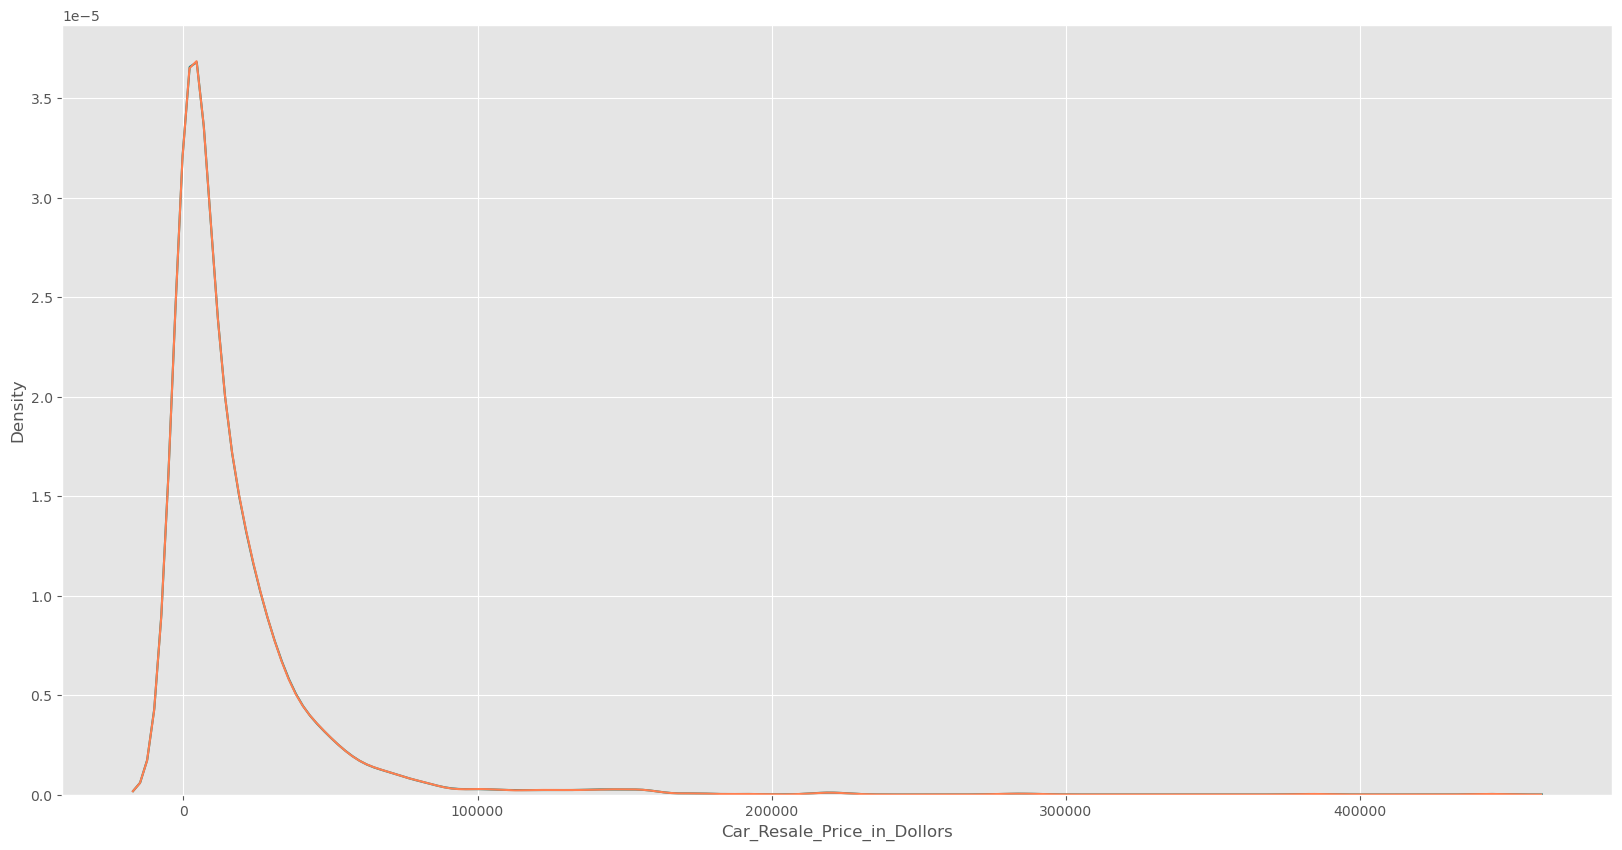

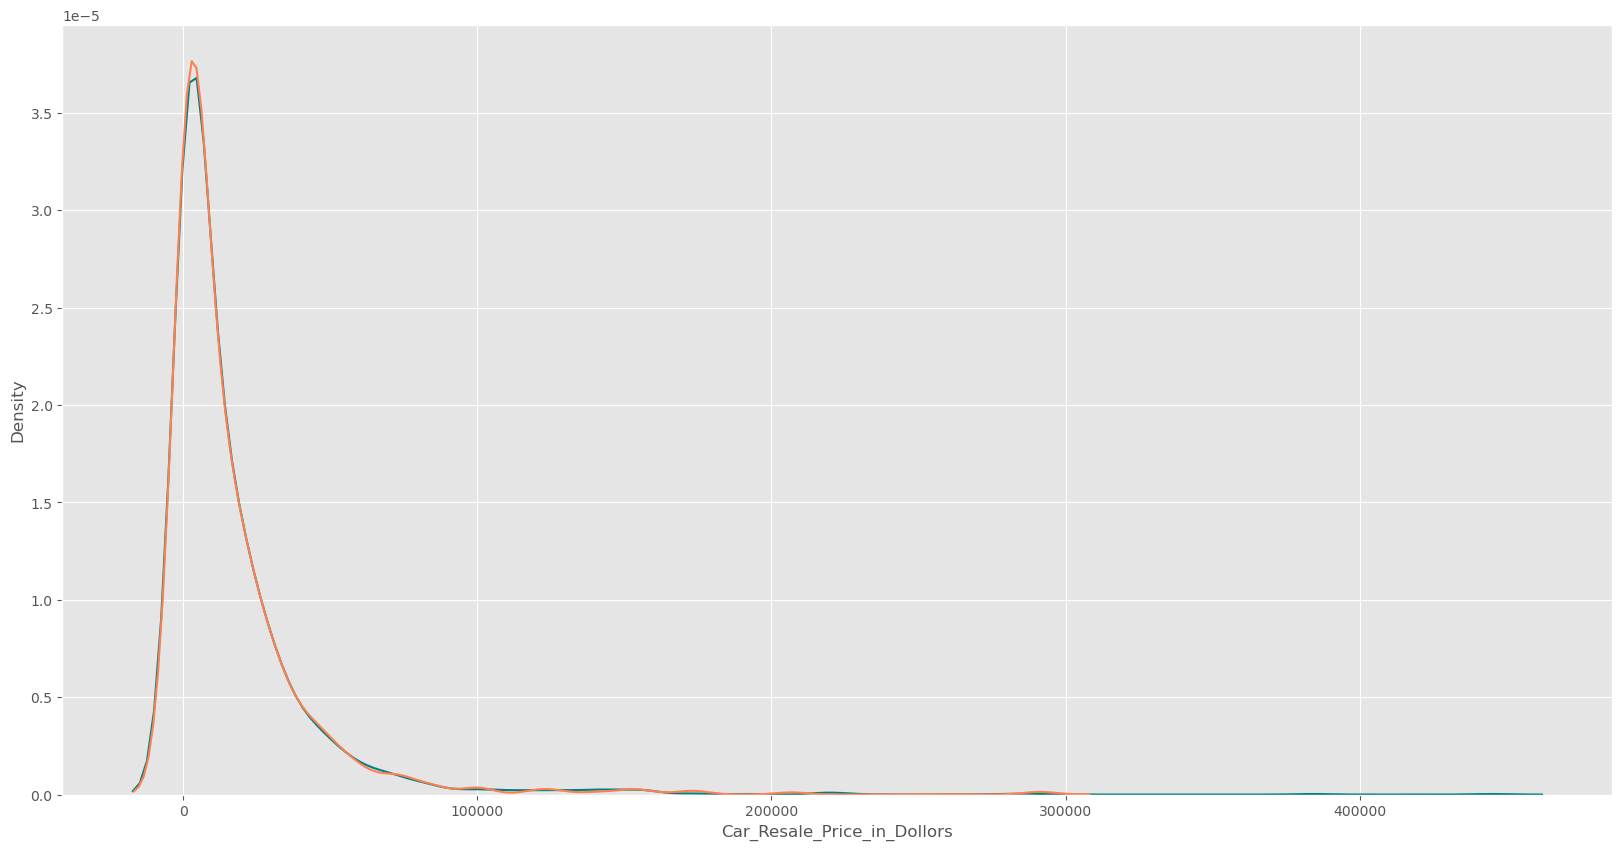

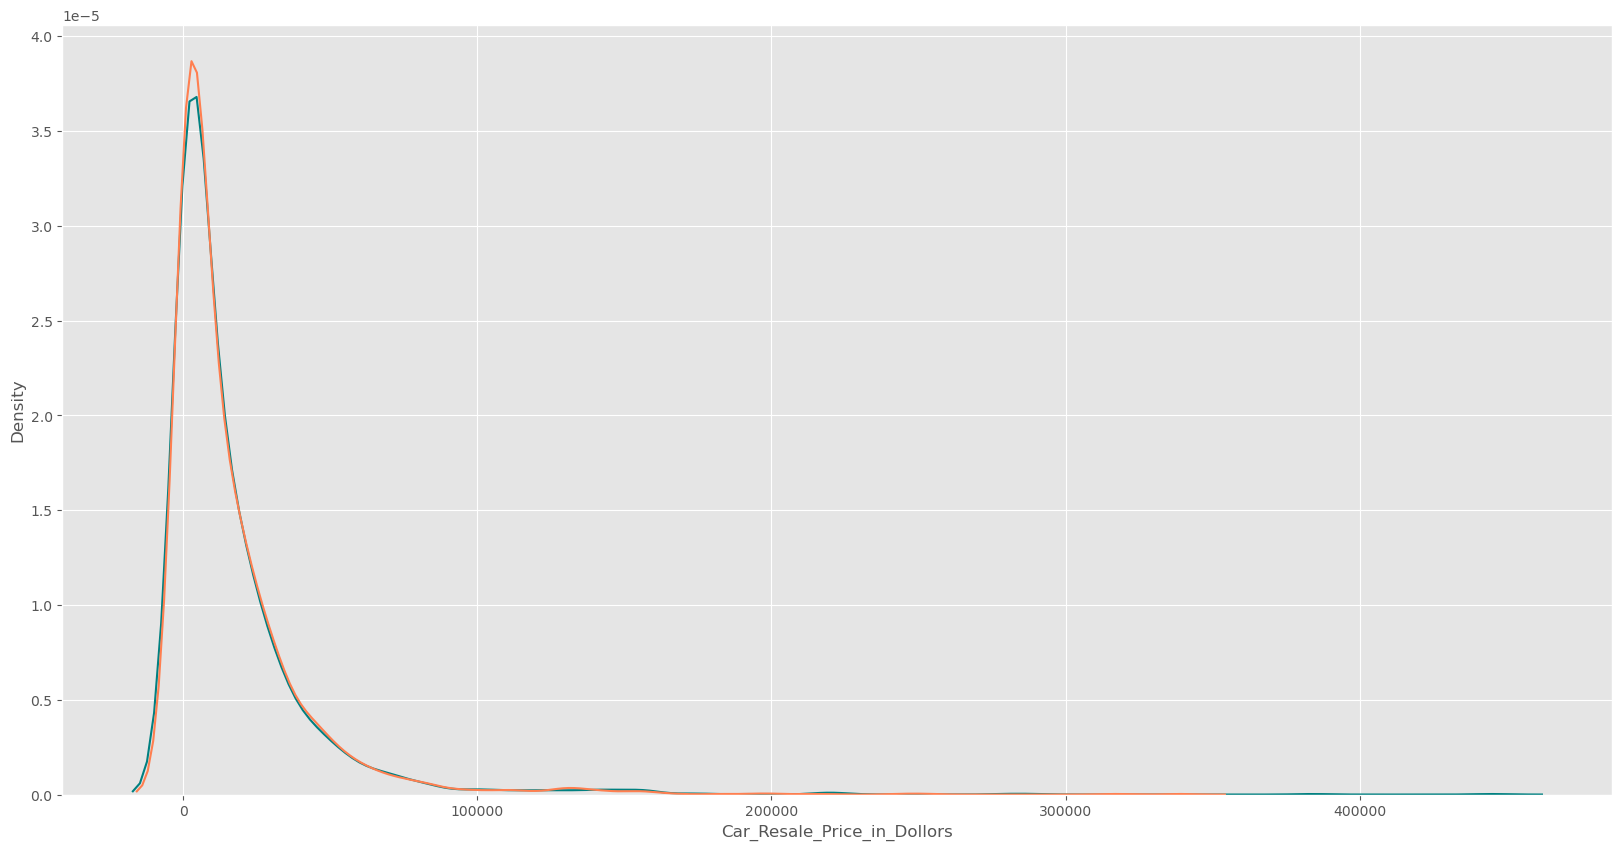

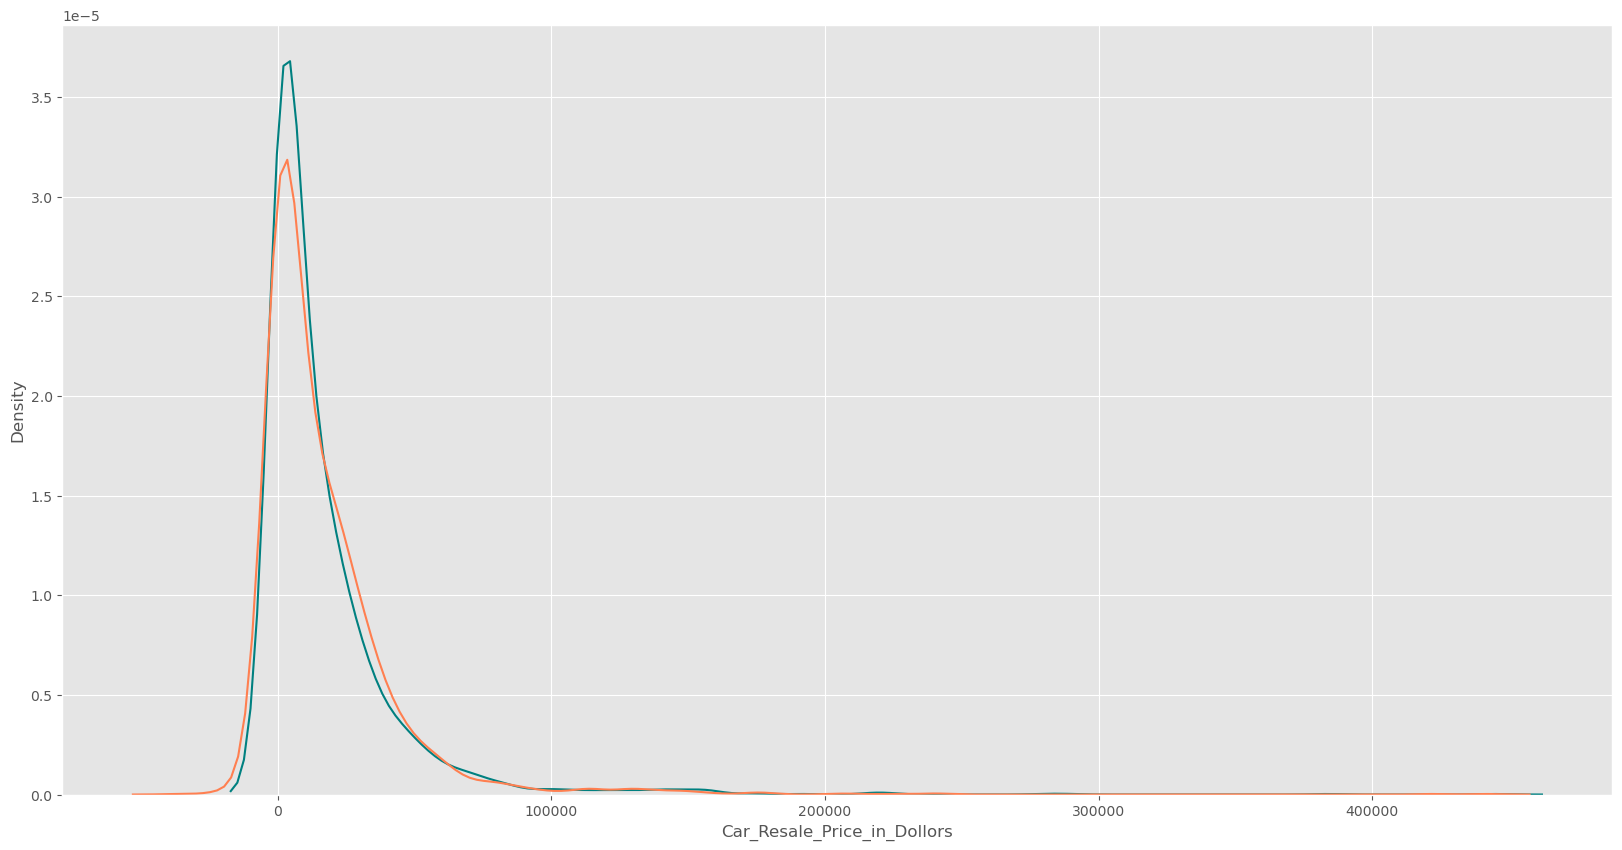

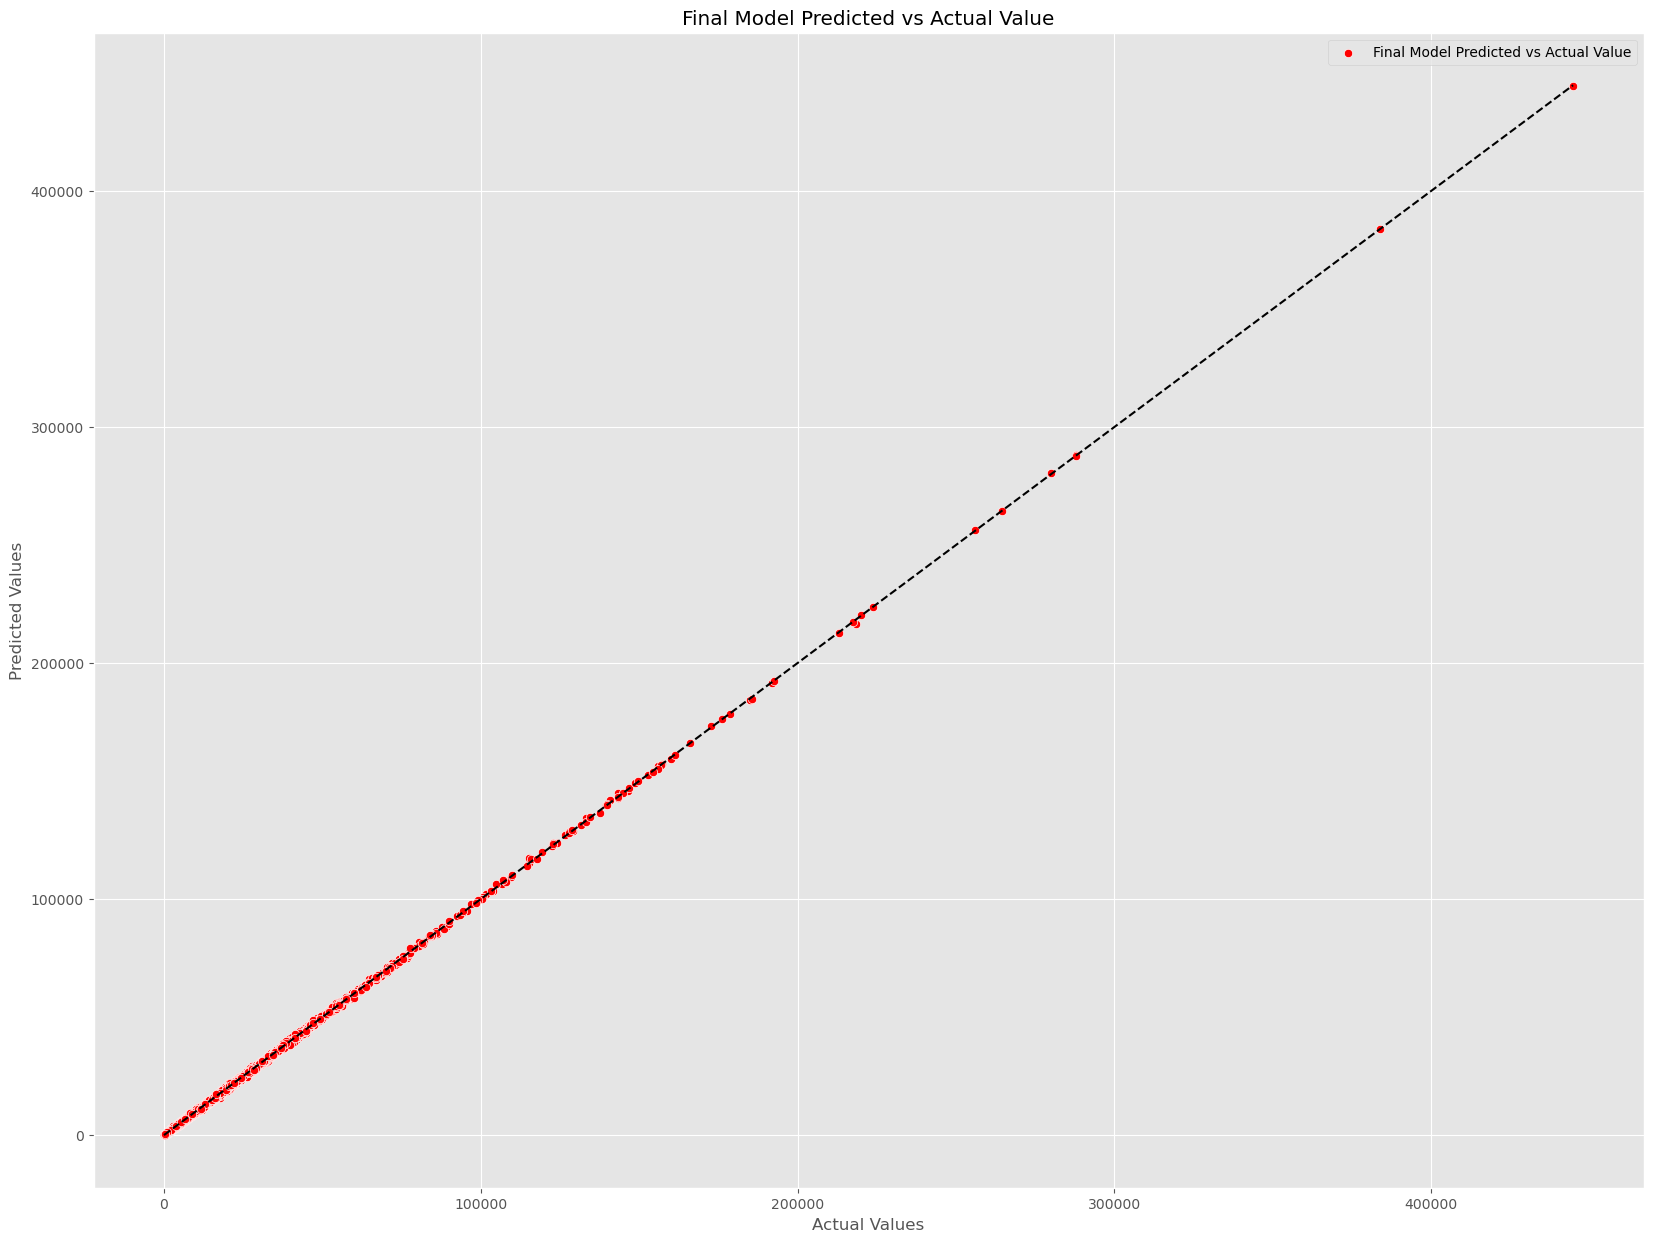

In [103]:
mplt.figure(figsize=(20, 15))
sea.scatterplot(x=my_used_car_resale_price_feature_Y, y=UCD_FINAL_GBM_Yhat, color="red", label="Final Model Predicted vs Actual Value")
mplt.plot([min(my_used_car_resale_price_feature_Y), max(my_used_car_resale_price_feature_Y)], [min(my_used_car_resale_price_feature_Y), max(my_used_car_resale_price_feature_Y)],color="black", linestyle="--", )
mplt.xlabel("Actual Values")
mplt.ylabel("Predicted Values")
mplt.title("Final Model Predicted vs Actual Value")
mplt.show()

**Conclusion:**

To conclude, the Gradient Boosting machine learning model helps the used car delarship company in predicting the accurate resale price of the 2nd hand or used cars with high level of confidence and accuracy to help the company to make data driven decisions.